In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, OPTICS
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, silhouette_samples
from scipy.spatial.distance import pdist, squareform
from mpl_toolkits.mplot3d import Axes3D
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.neighbors import NearestNeighbors
import matplotlib.cm as cm
from sklearn.cluster import DBSCAN

In [ ]:
#pip install sweetviz
#dataset : 

In [ ]:
url = '/content/drive/MyDrive/SC/ml6.csv'
df = pd.read_csv(url)

In [ ]:
print(df.shape)
df.head()

(8950, 18)


CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

# Statistics

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

null values in
1. MINIMUM_PAYMENTS
2. CREDIT_LIMIT

In [ ]:
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [ ]:
df.isna().mean()*100

CUST_ID                             0.000000
BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_FREQUENCY                 0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       0.000000
CREDIT_LIMIT                        0.011173
PAYMENTS                            0.000000
MINIMUM_PAYMENTS                    3.497207
PRC_FULL_PAYMENT                    0.000000
TENURE                              0.000000
dtype: float64

In [ ]:
# putting the mean values of their column if the value is found to be null
df.loc[(df['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS']=df['MINIMUM_PAYMENTS'].mean()
df.loc[(df['CREDIT_LIMIT'].isnull()==True),'CREDIT_LIMIT']=df['CREDIT_LIMIT'].mean()

In [ ]:
df.isna().mean()*100

CUST_ID                             0.0
BALANCE                             0.0
BALANCE_FREQUENCY                   0.0
PURCHASES                           0.0
ONEOFF_PURCHASES                    0.0
INSTALLMENTS_PURCHASES              0.0
CASH_ADVANCE                        0.0
PURCHASES_FREQUENCY                 0.0
ONEOFF_PURCHASES_FREQUENCY          0.0
PURCHASES_INSTALLMENTS_FREQUENCY    0.0
CASH_ADVANCE_FREQUENCY              0.0
CASH_ADVANCE_TRX                    0.0
PURCHASES_TRX                       0.0
CREDIT_LIMIT                        0.0
PAYMENTS                            0.0
MINIMUM_PAYMENTS                    0.0
PRC_FULL_PAYMENT                    0.0
TENURE                              0.0
dtype: float64

In [ ]:
# DROP customer_id b/c it is not required for segmentation
df = df.drop(columns=['CUST_ID'])

In [ ]:
df.head().shape
#Earlier it was 18 now it is 17.

(5, 17)

# Visualizations

                                             |          | [  0%]   00:00 -> (? left)


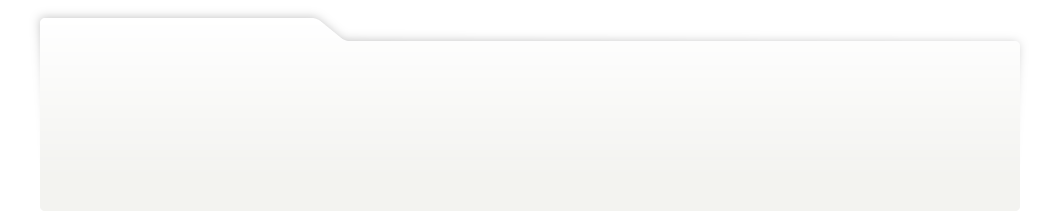
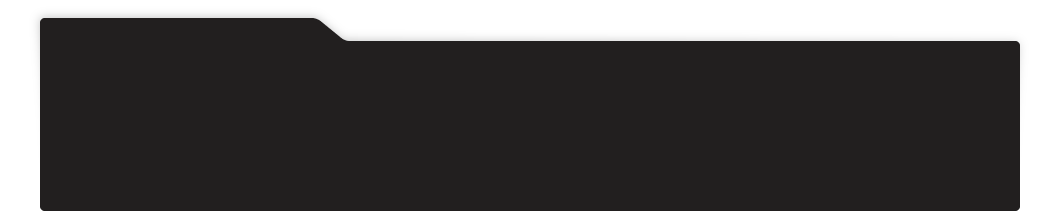
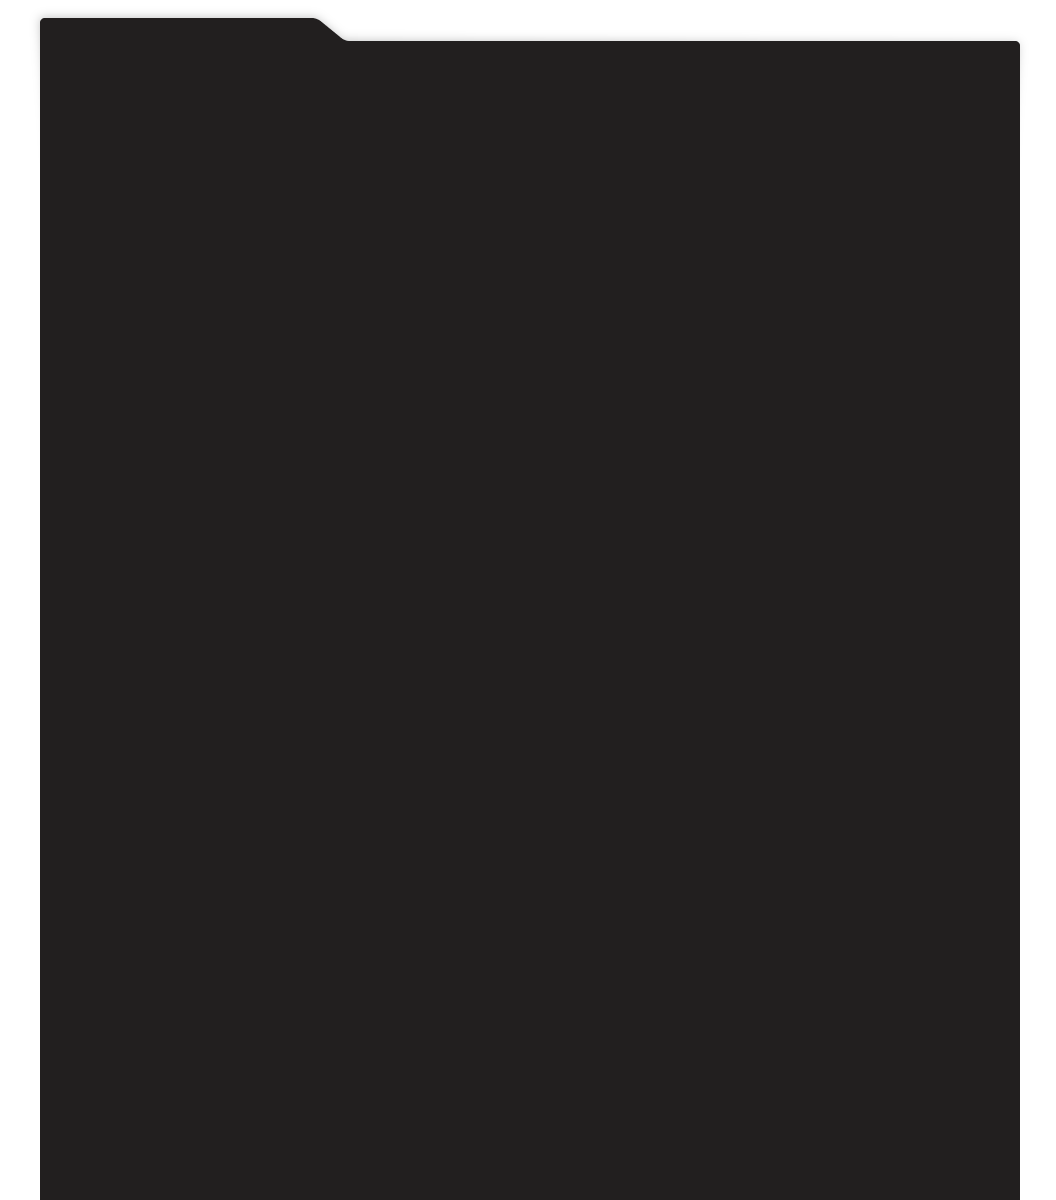
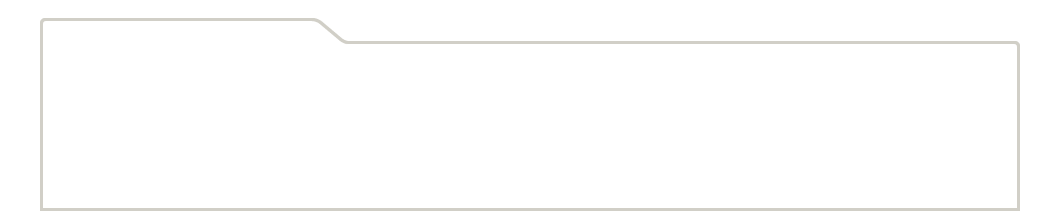
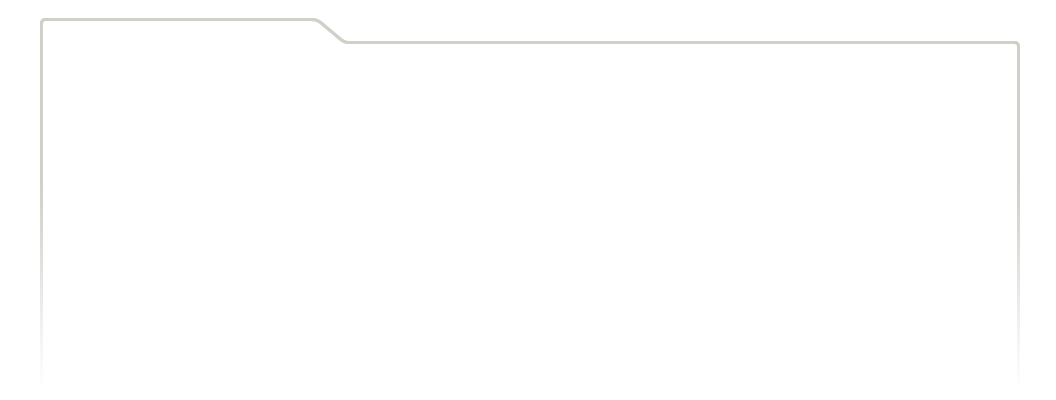
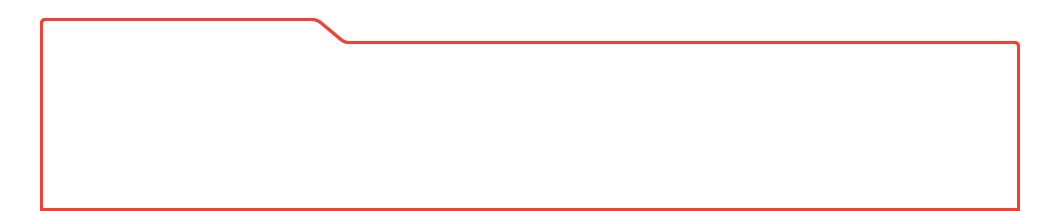
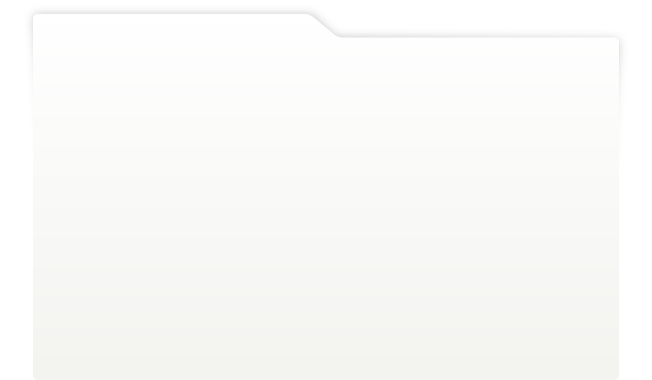
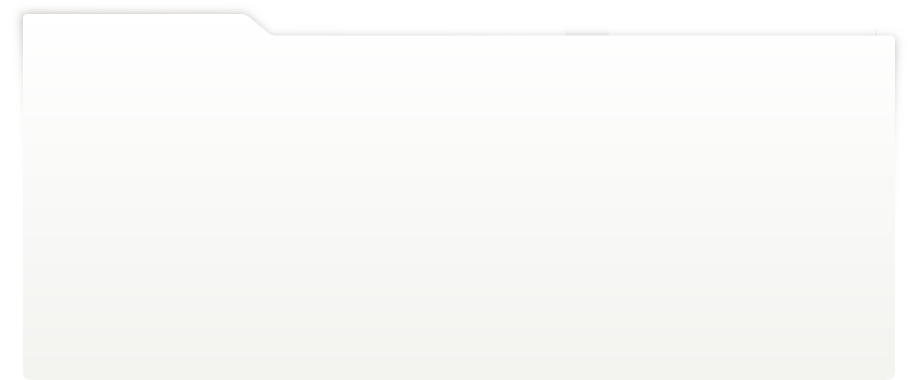
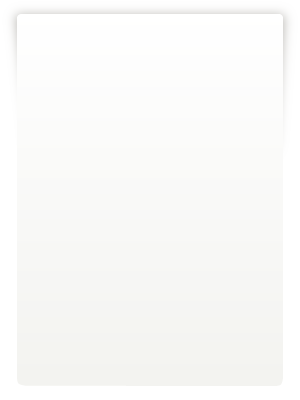
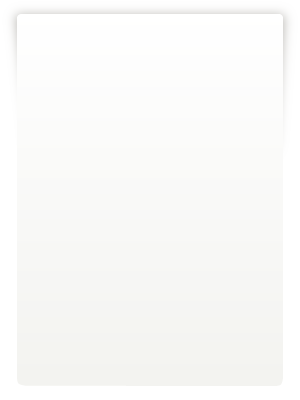
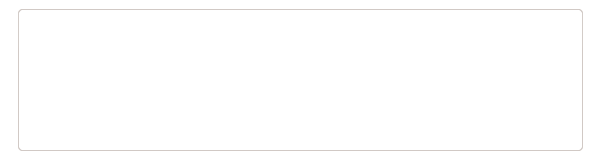
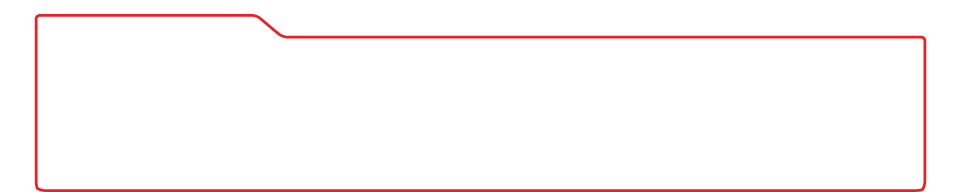
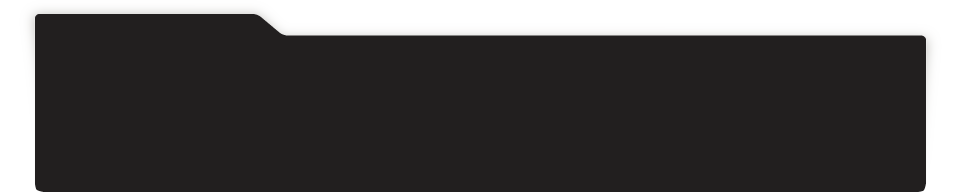
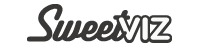
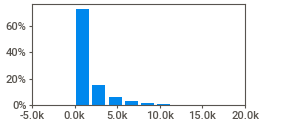
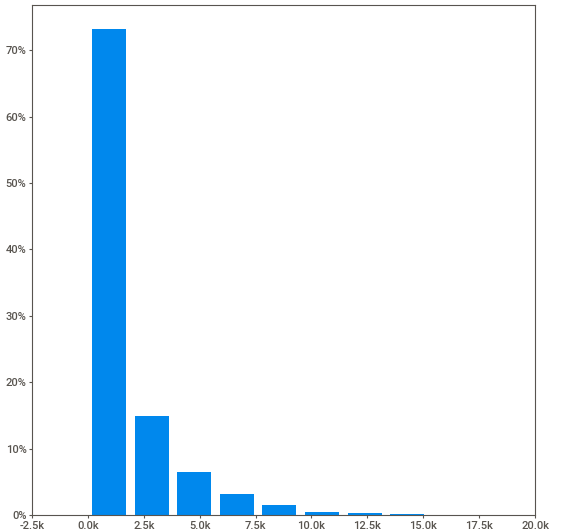
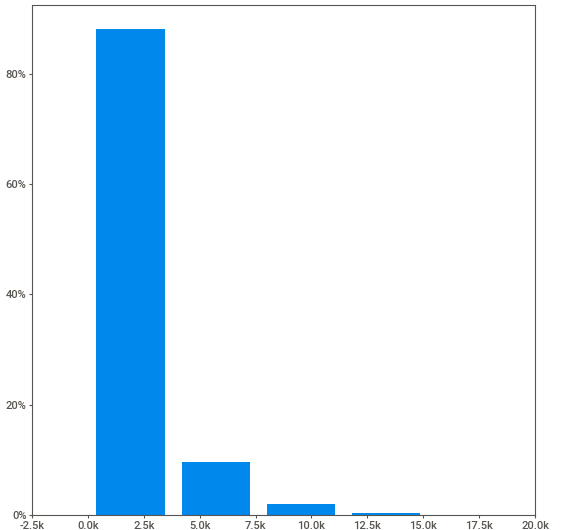
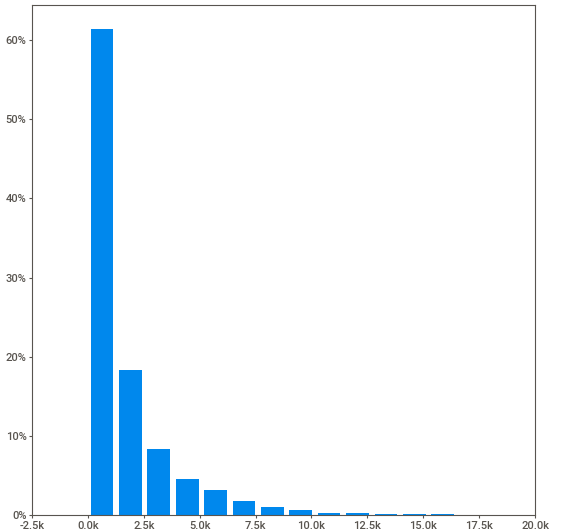
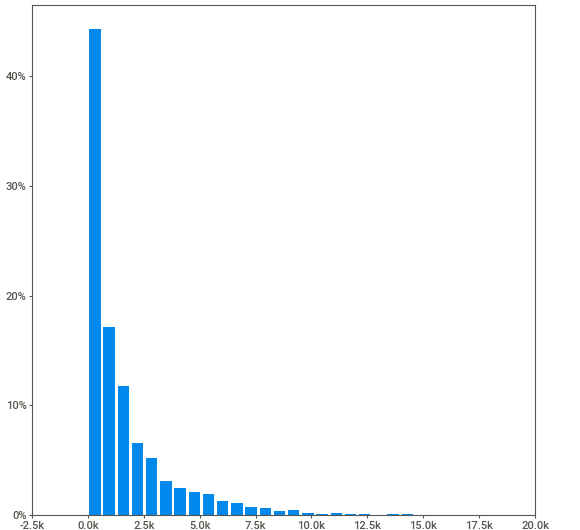
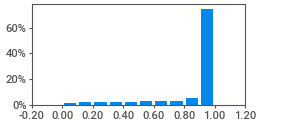
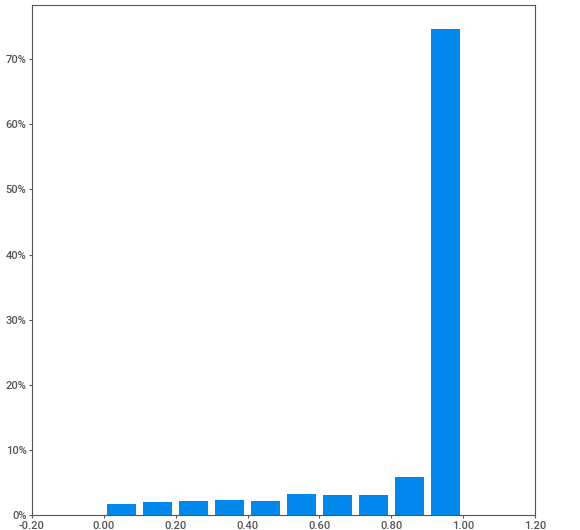
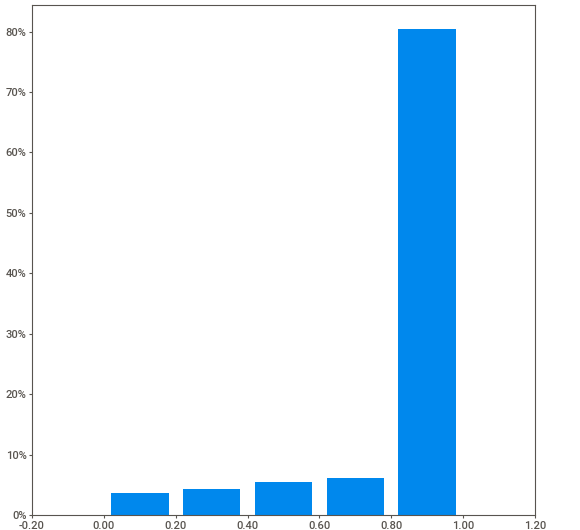
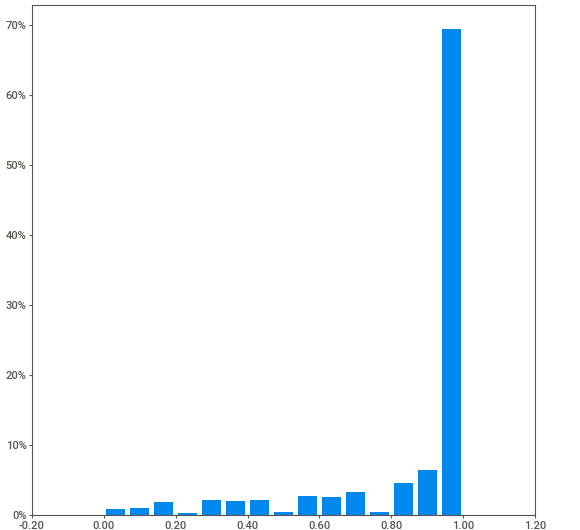
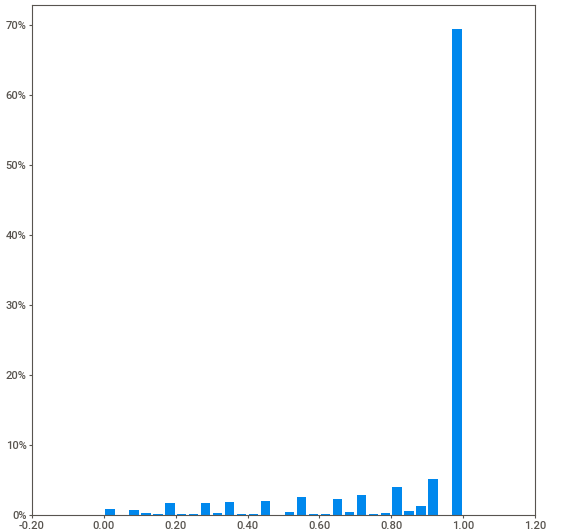
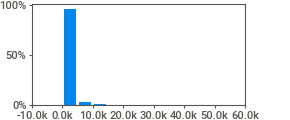
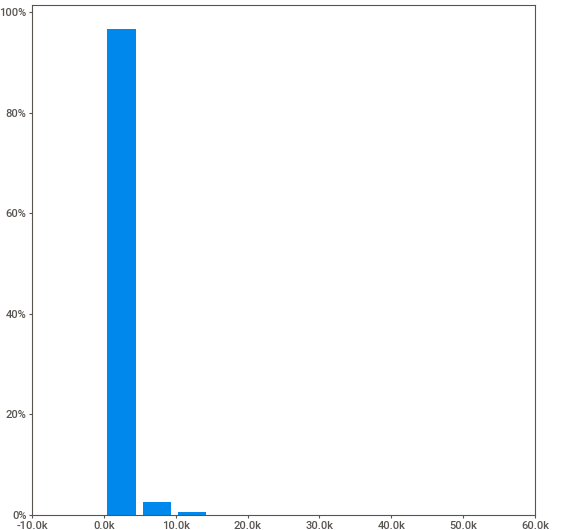
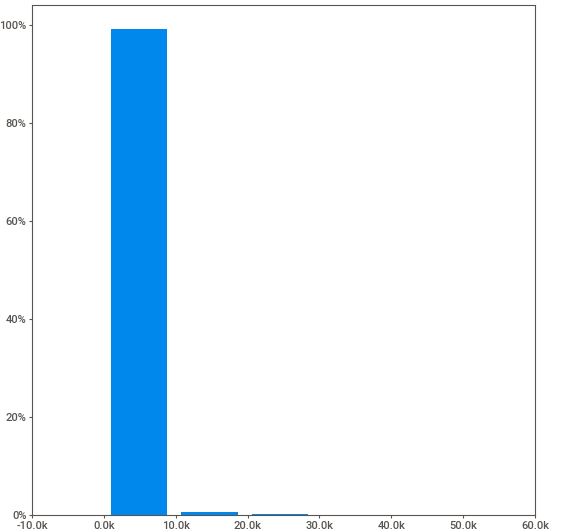
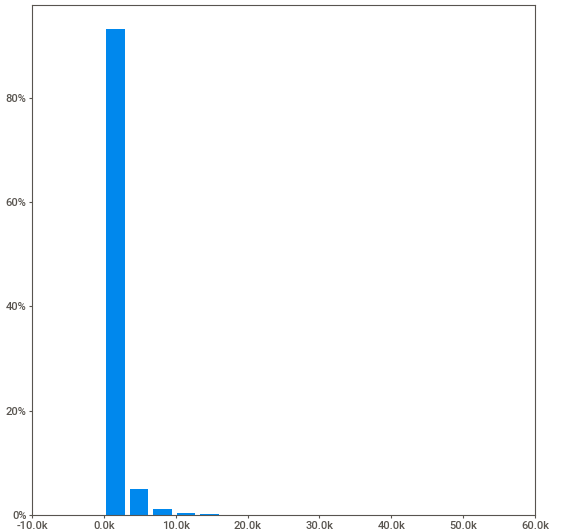
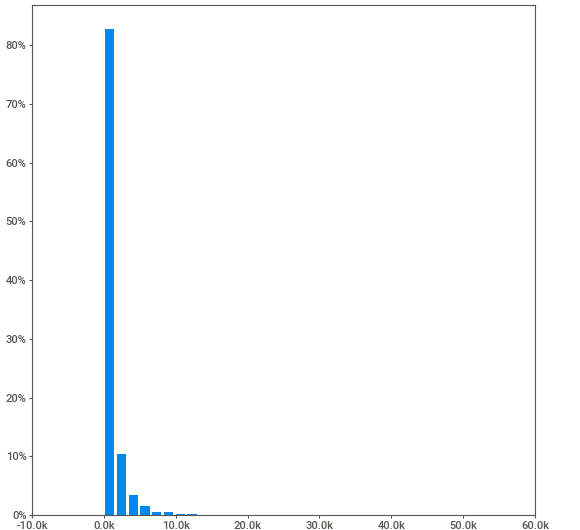
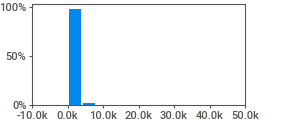
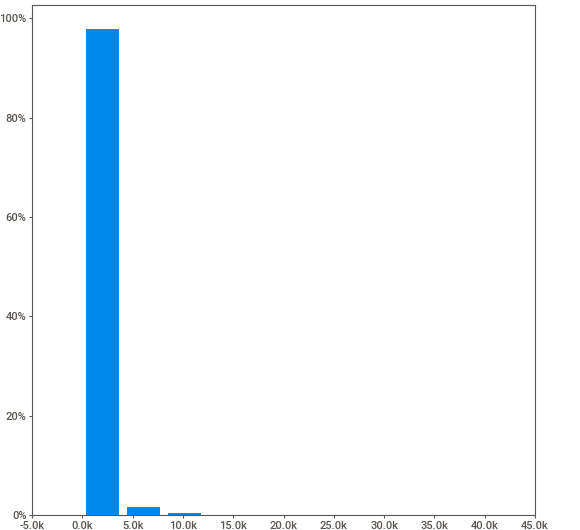
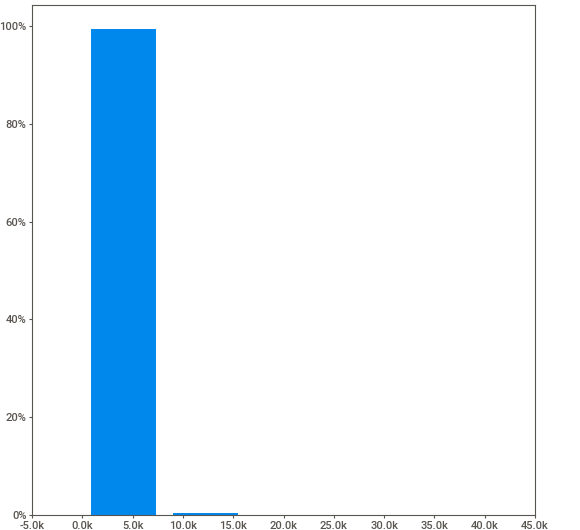
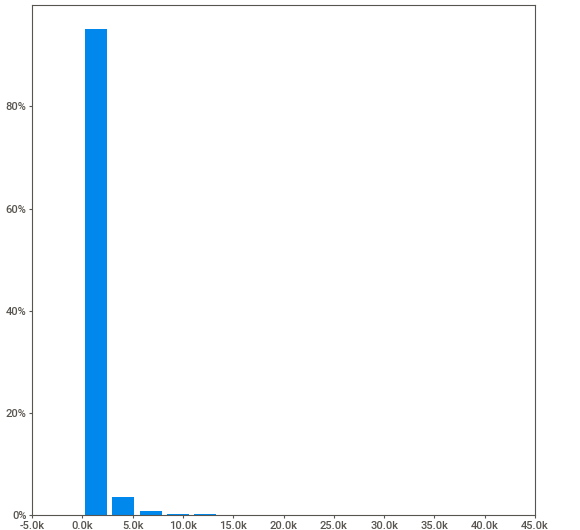
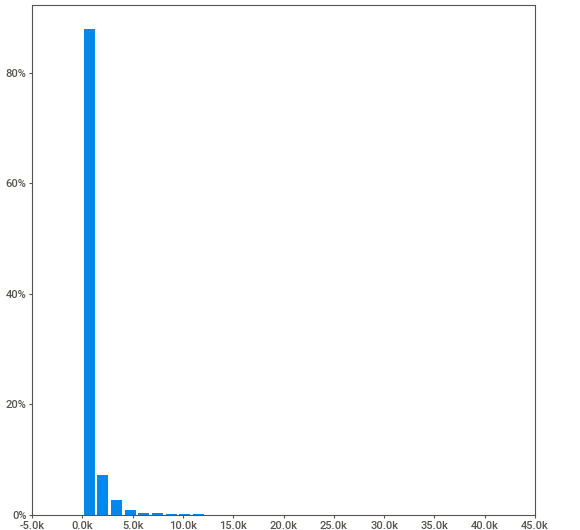
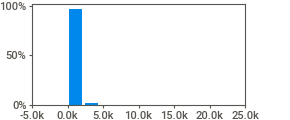
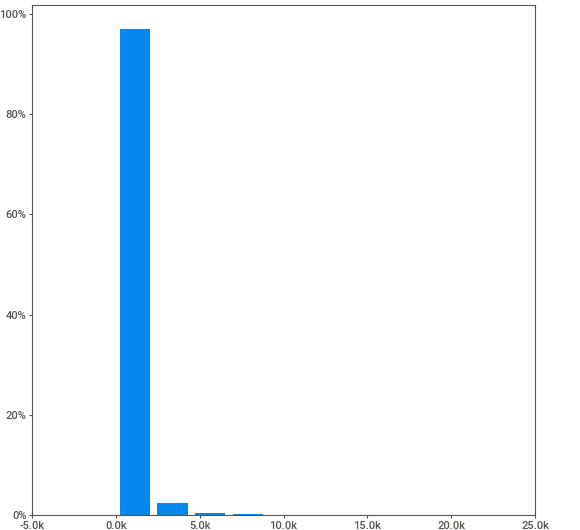
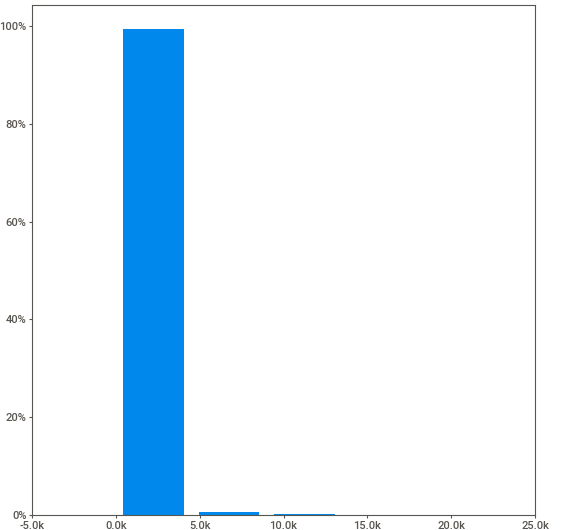
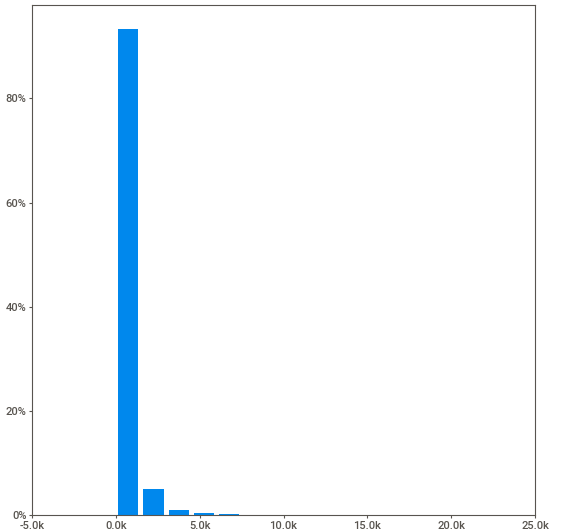
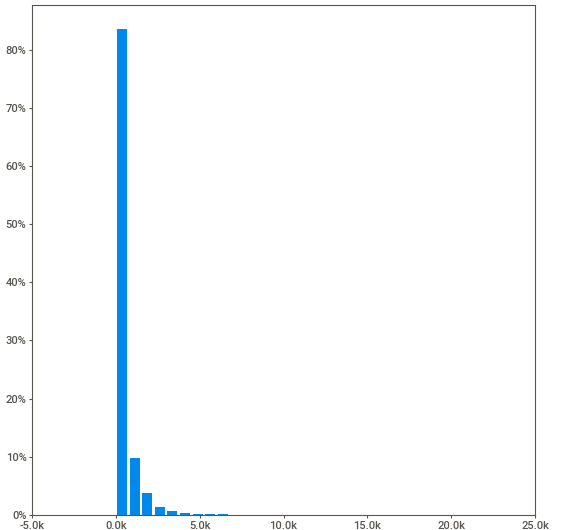
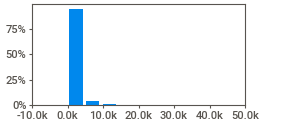
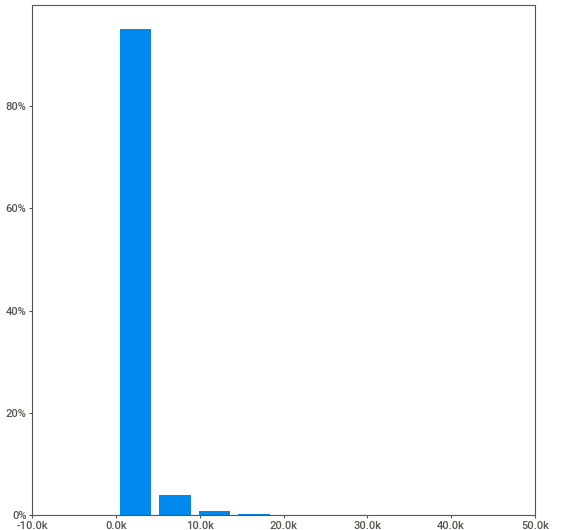
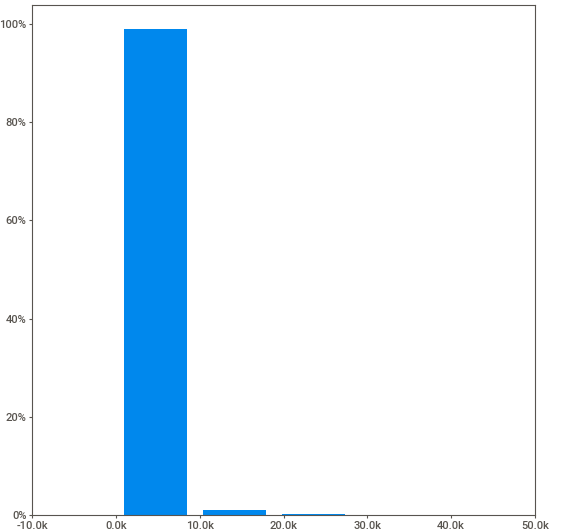
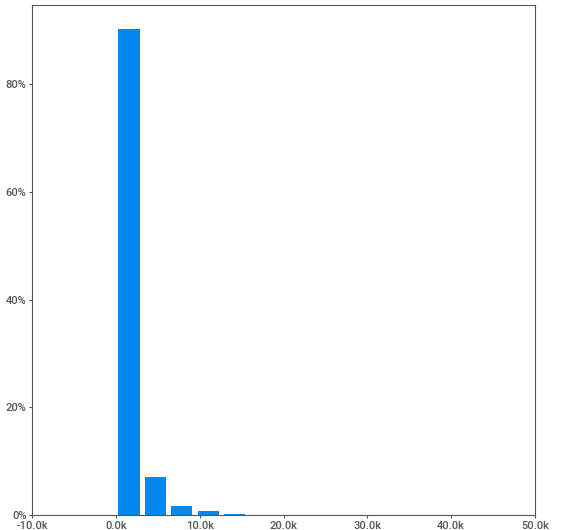
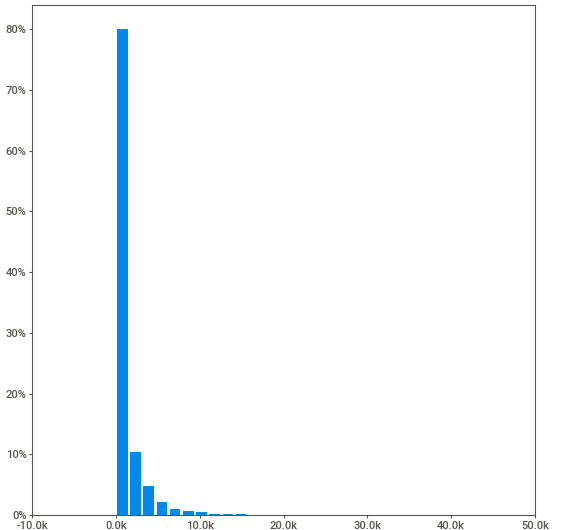
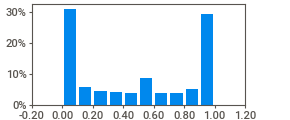
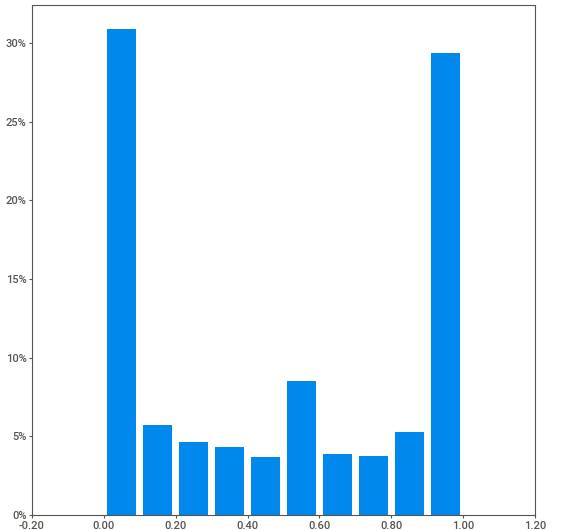
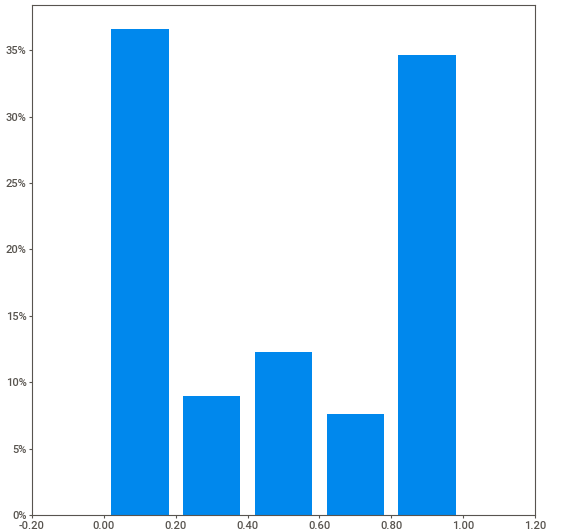
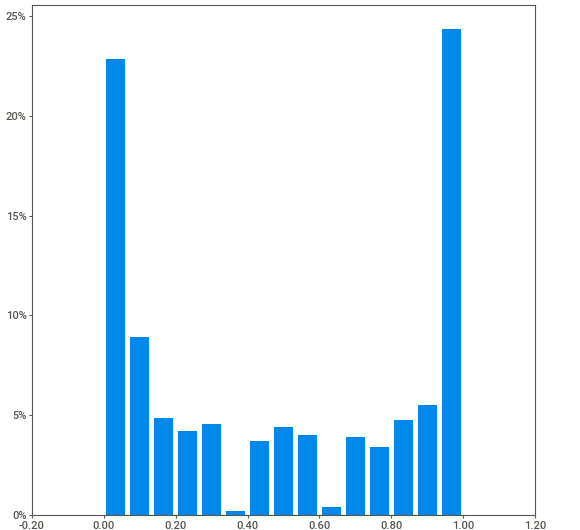
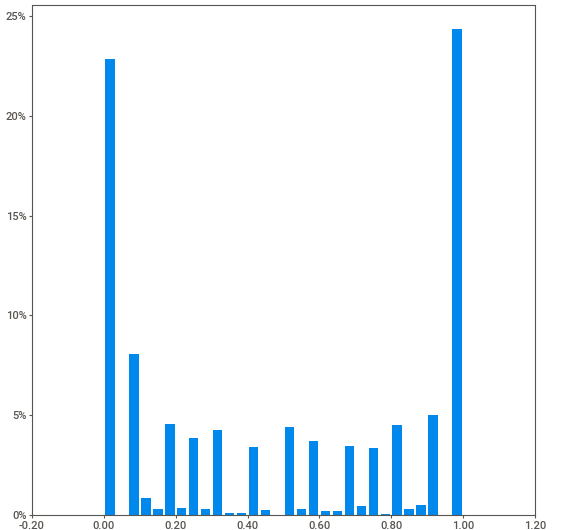
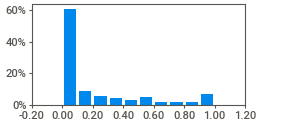
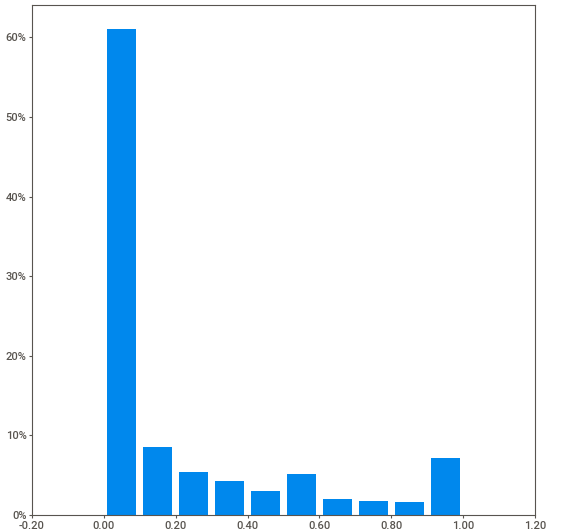
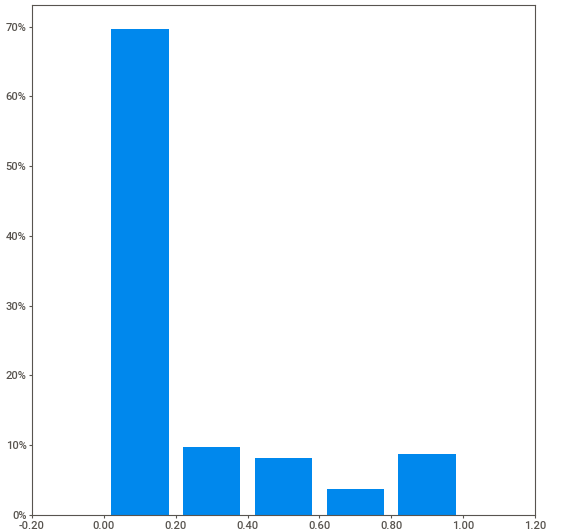
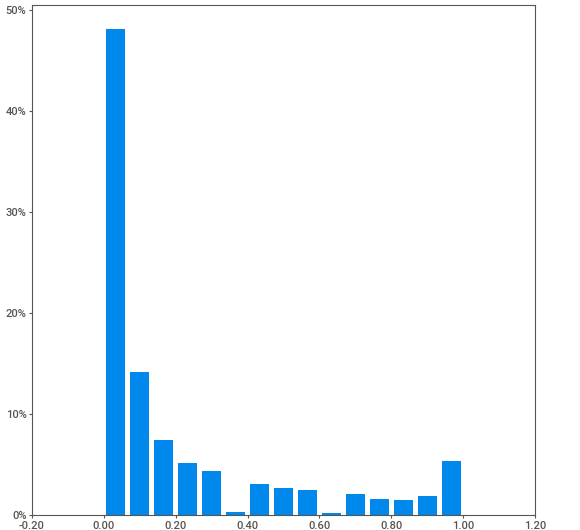
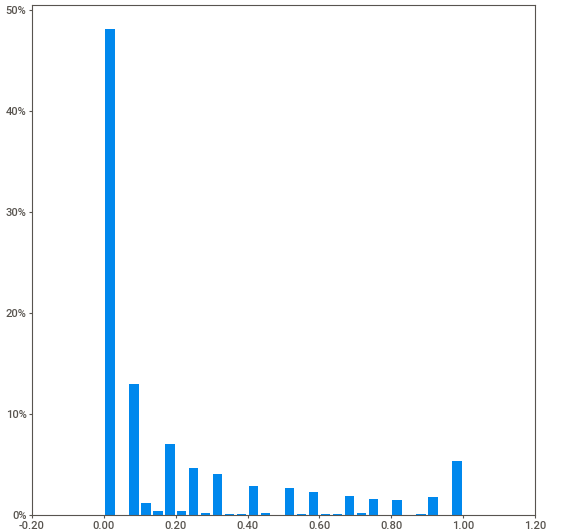
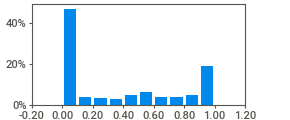
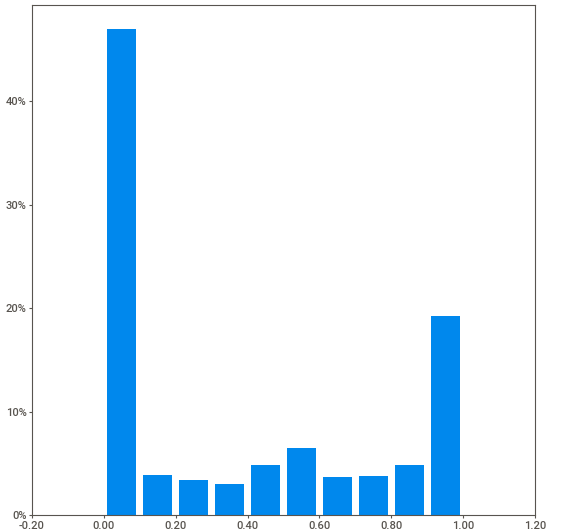
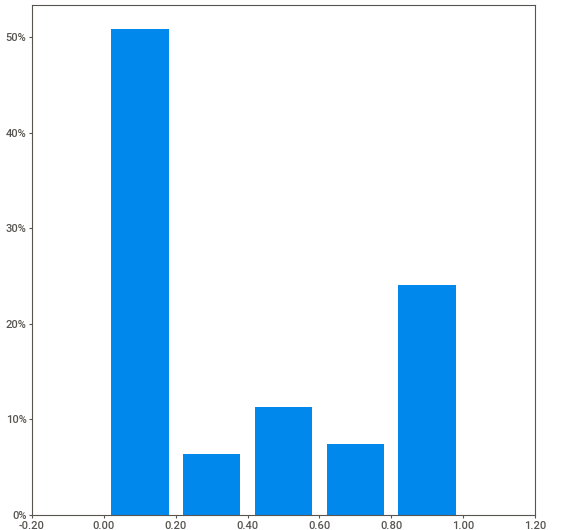
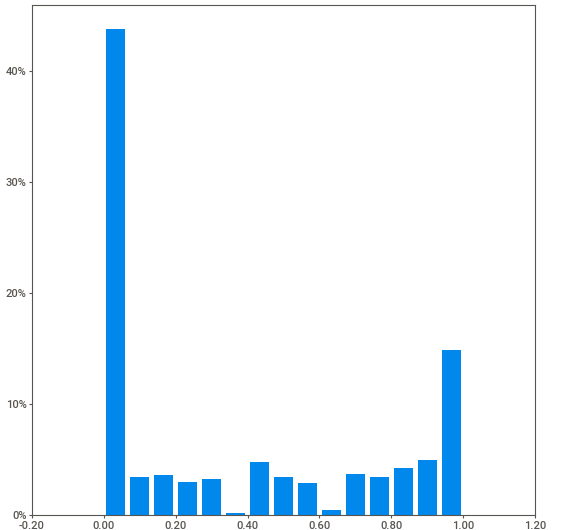
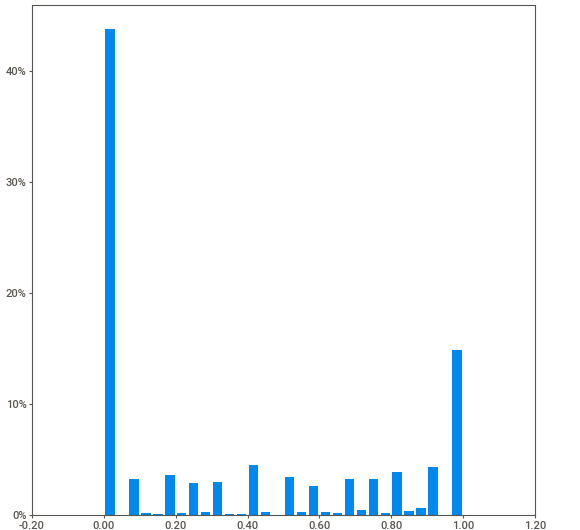
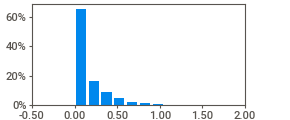
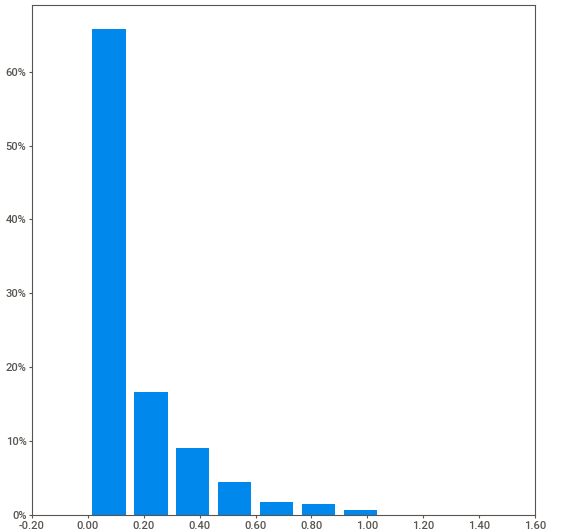
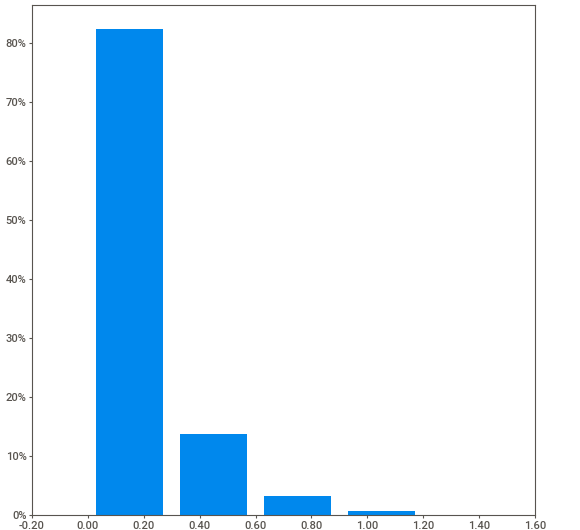
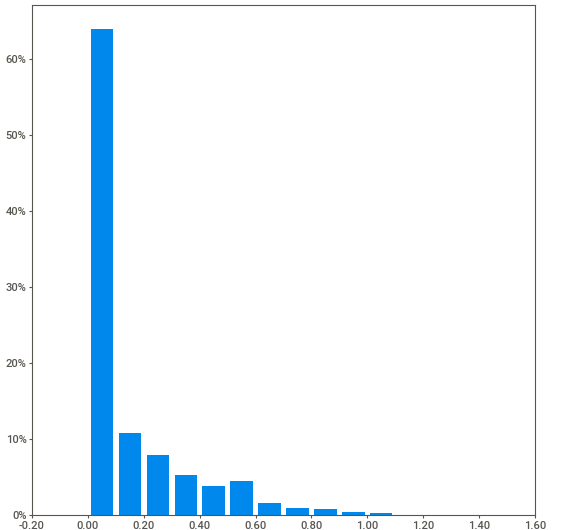
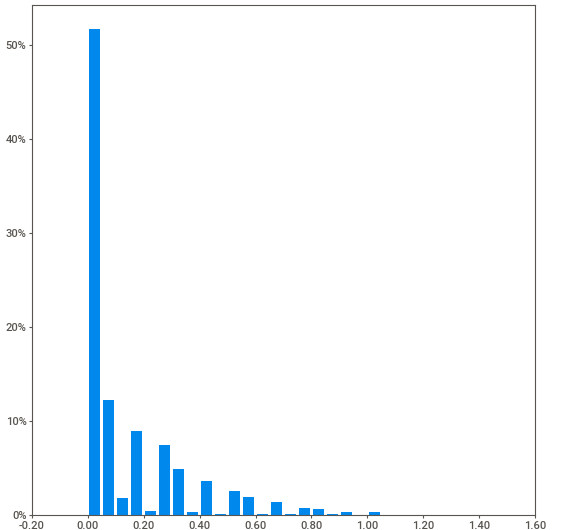
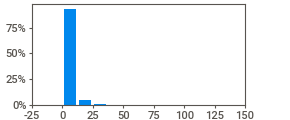
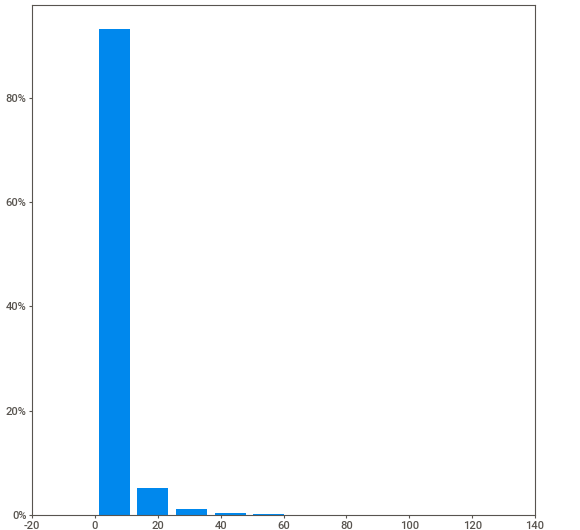
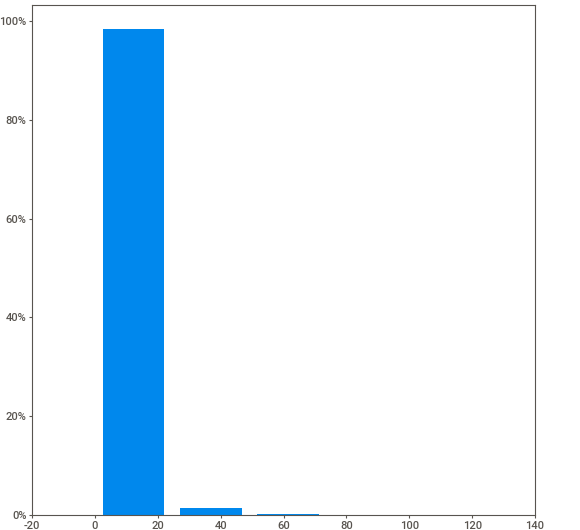
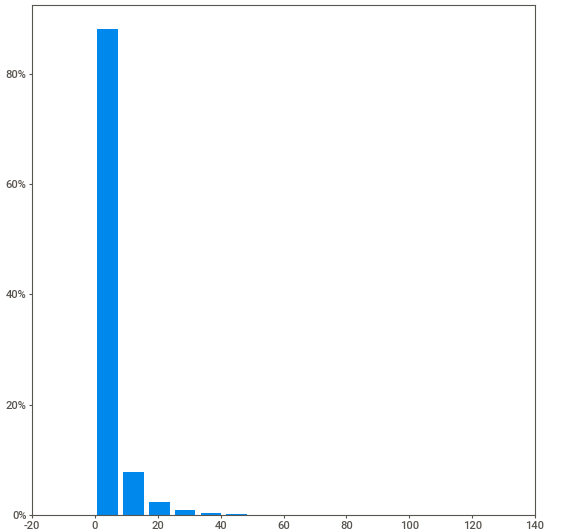
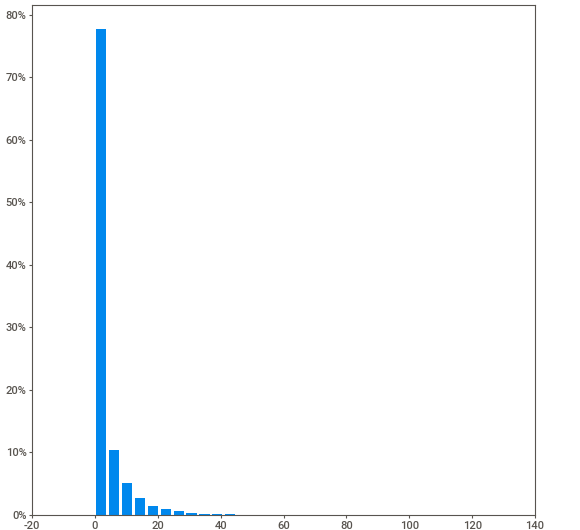
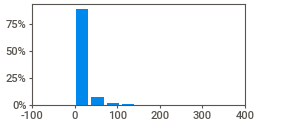
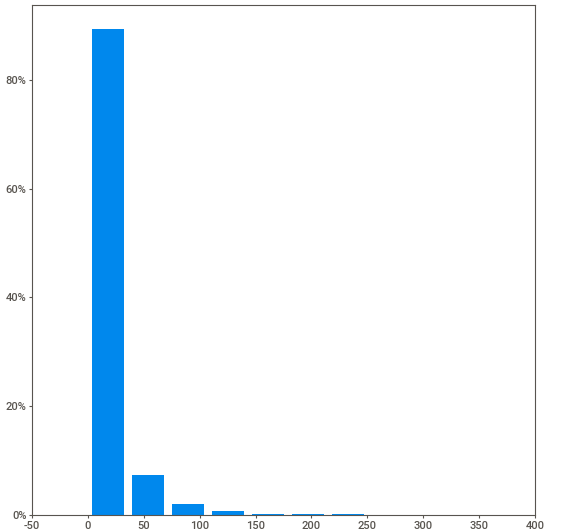
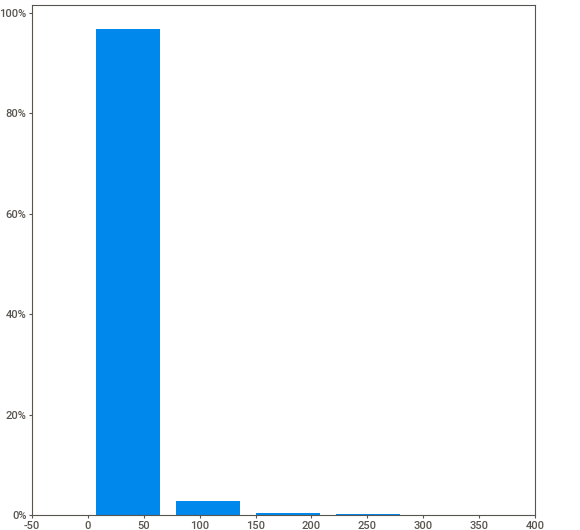
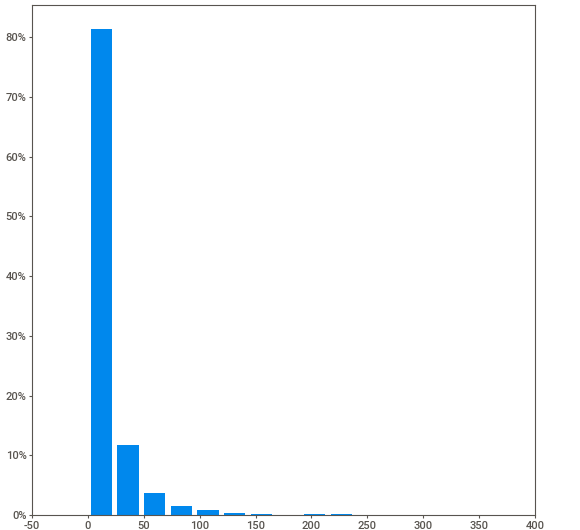
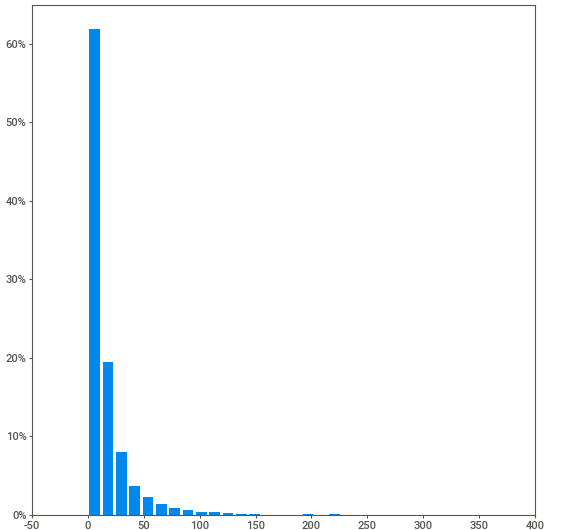
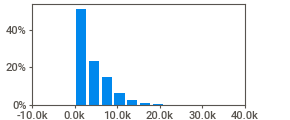
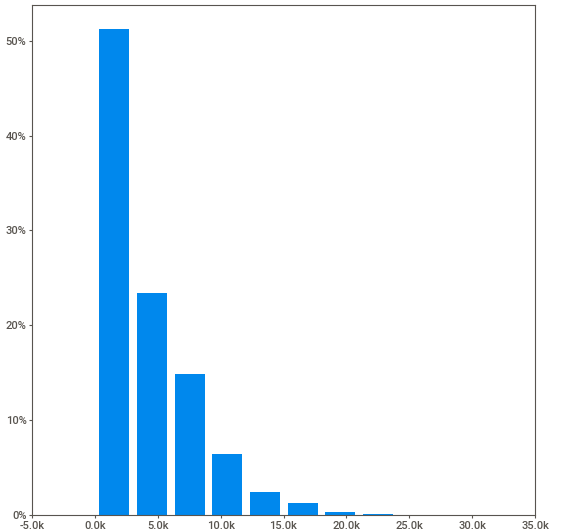
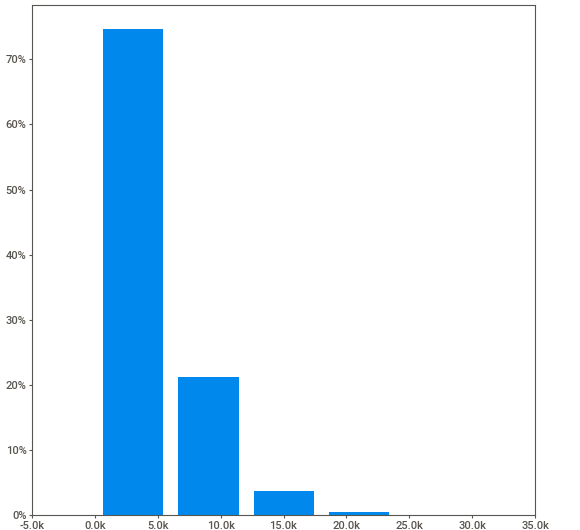
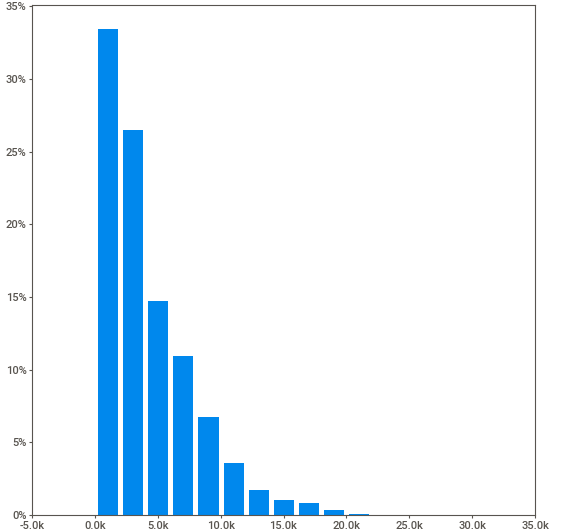
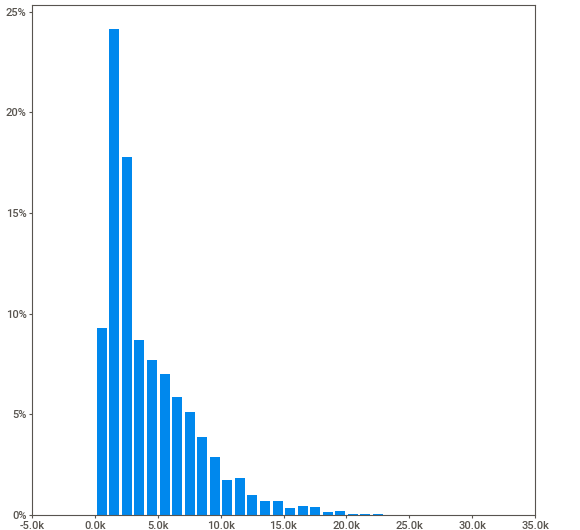
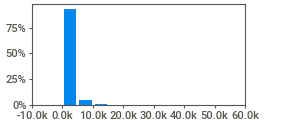
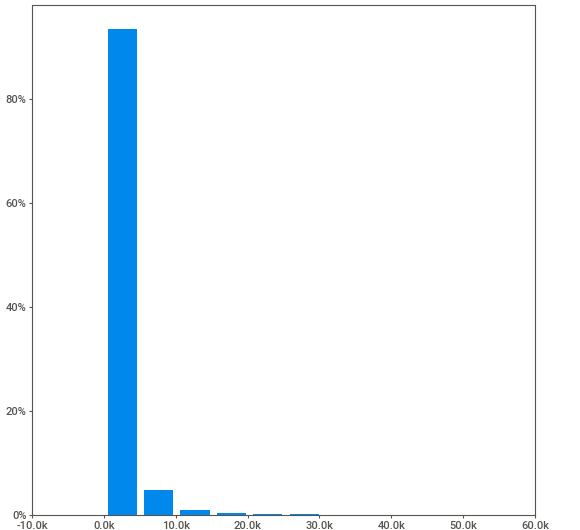
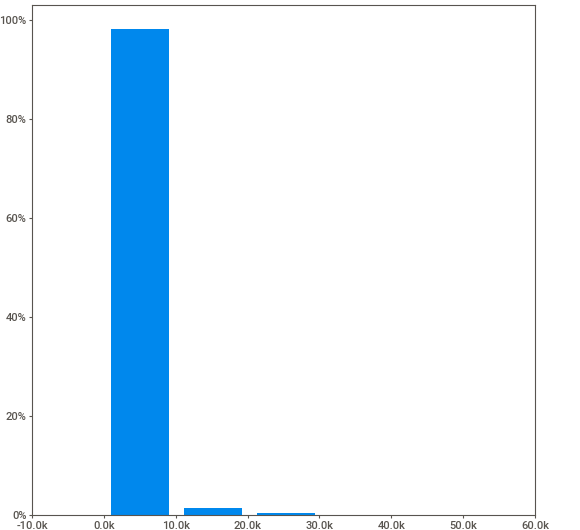
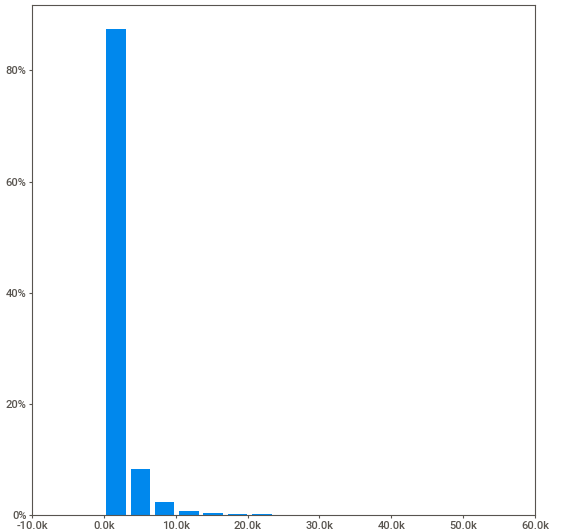
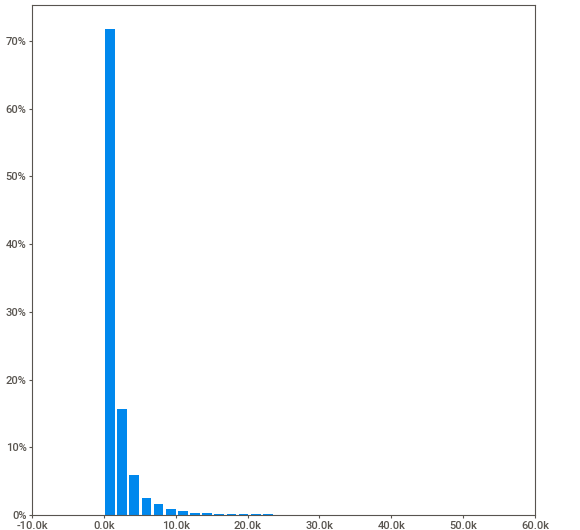
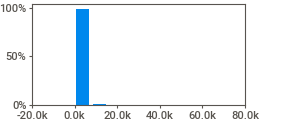
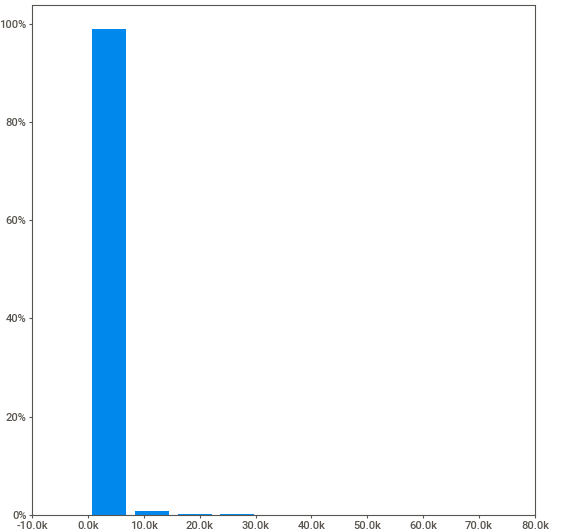
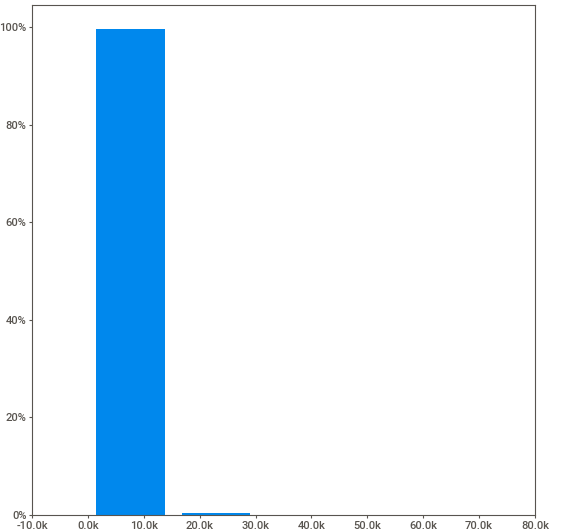
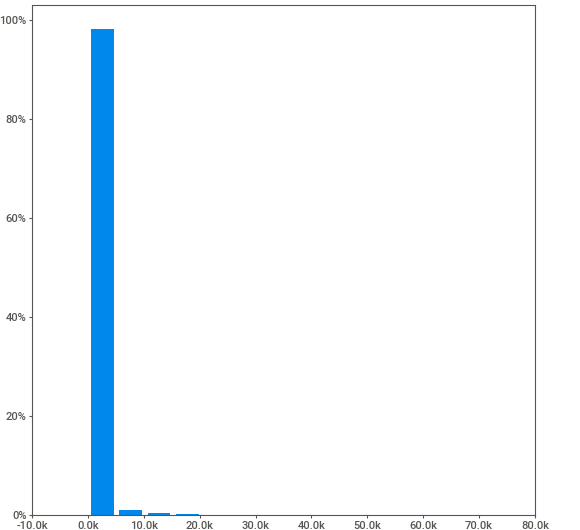
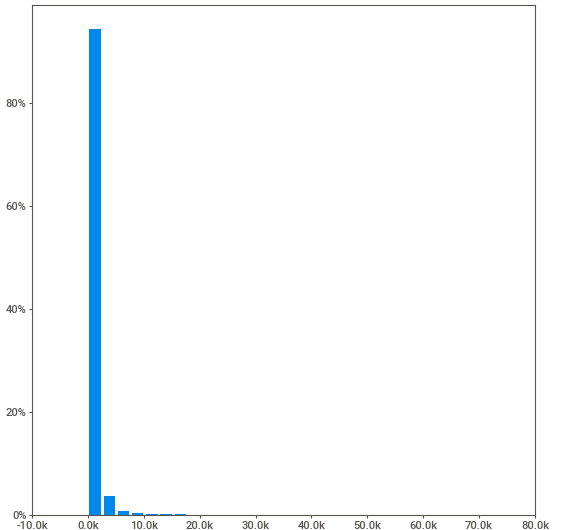
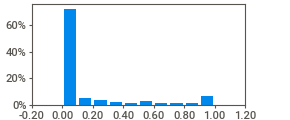
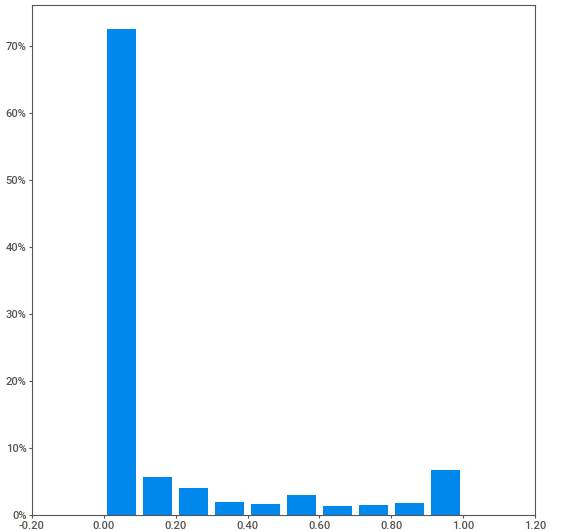
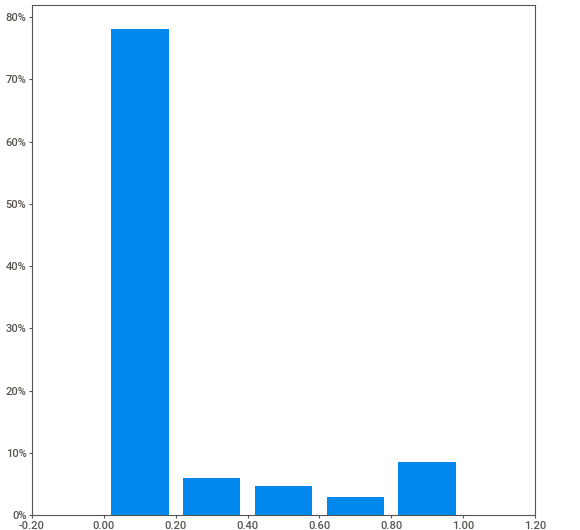
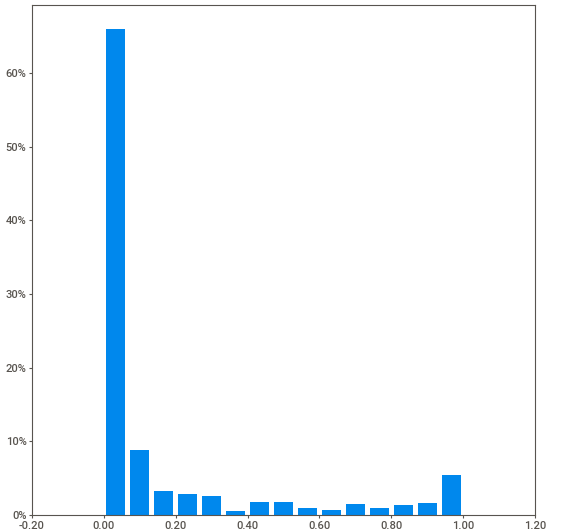
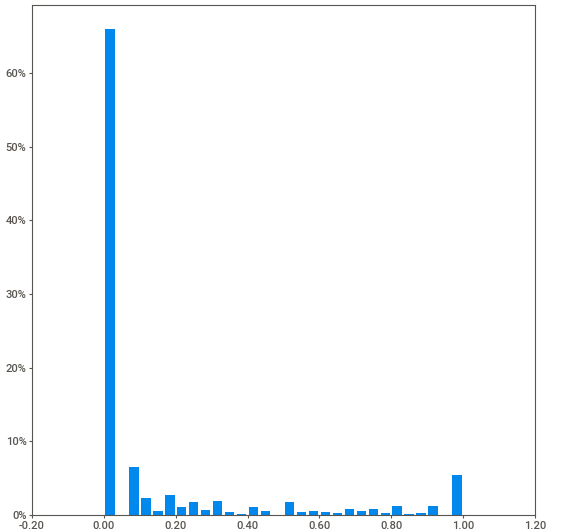
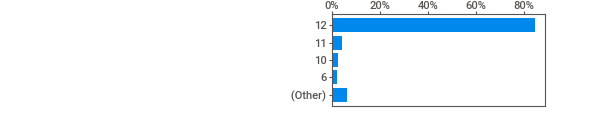
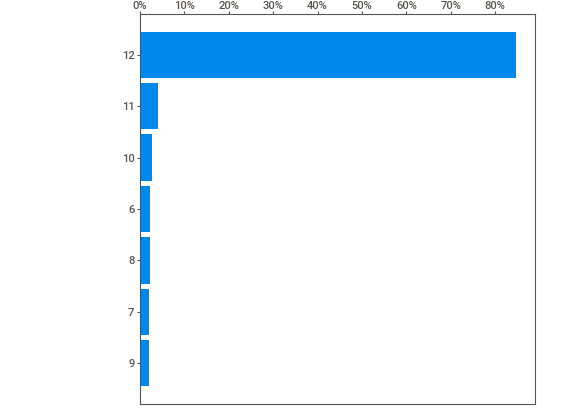
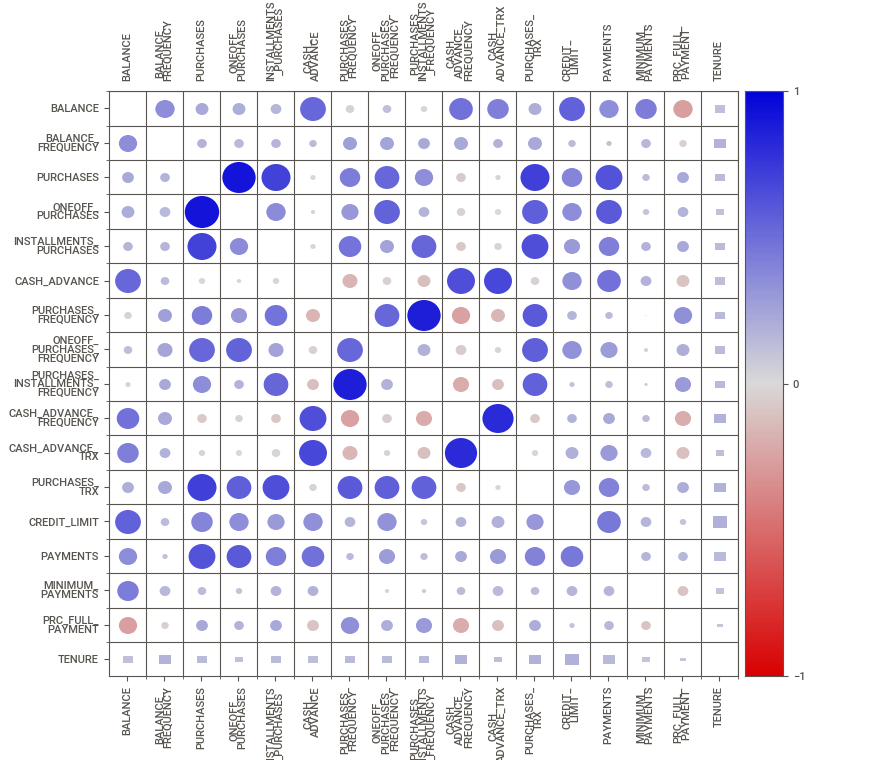
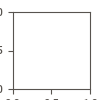

In [ ]:
import sweetviz as sv

report = sv.analyze(df)
report.show_notebook()

In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

                                             |          | [  0%]   00:00 -> (? left)


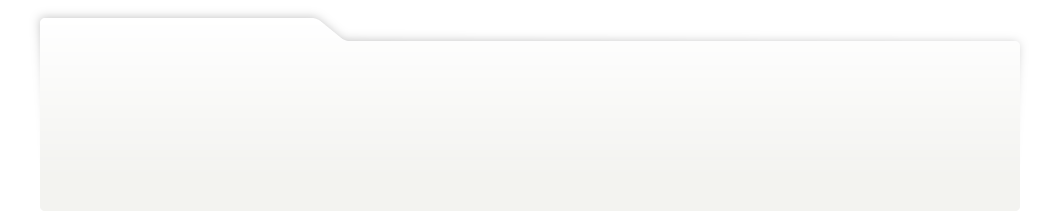
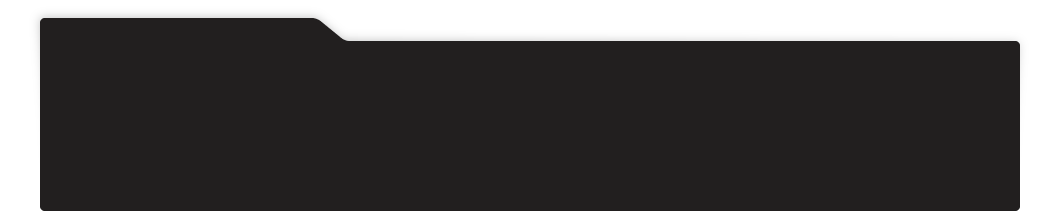
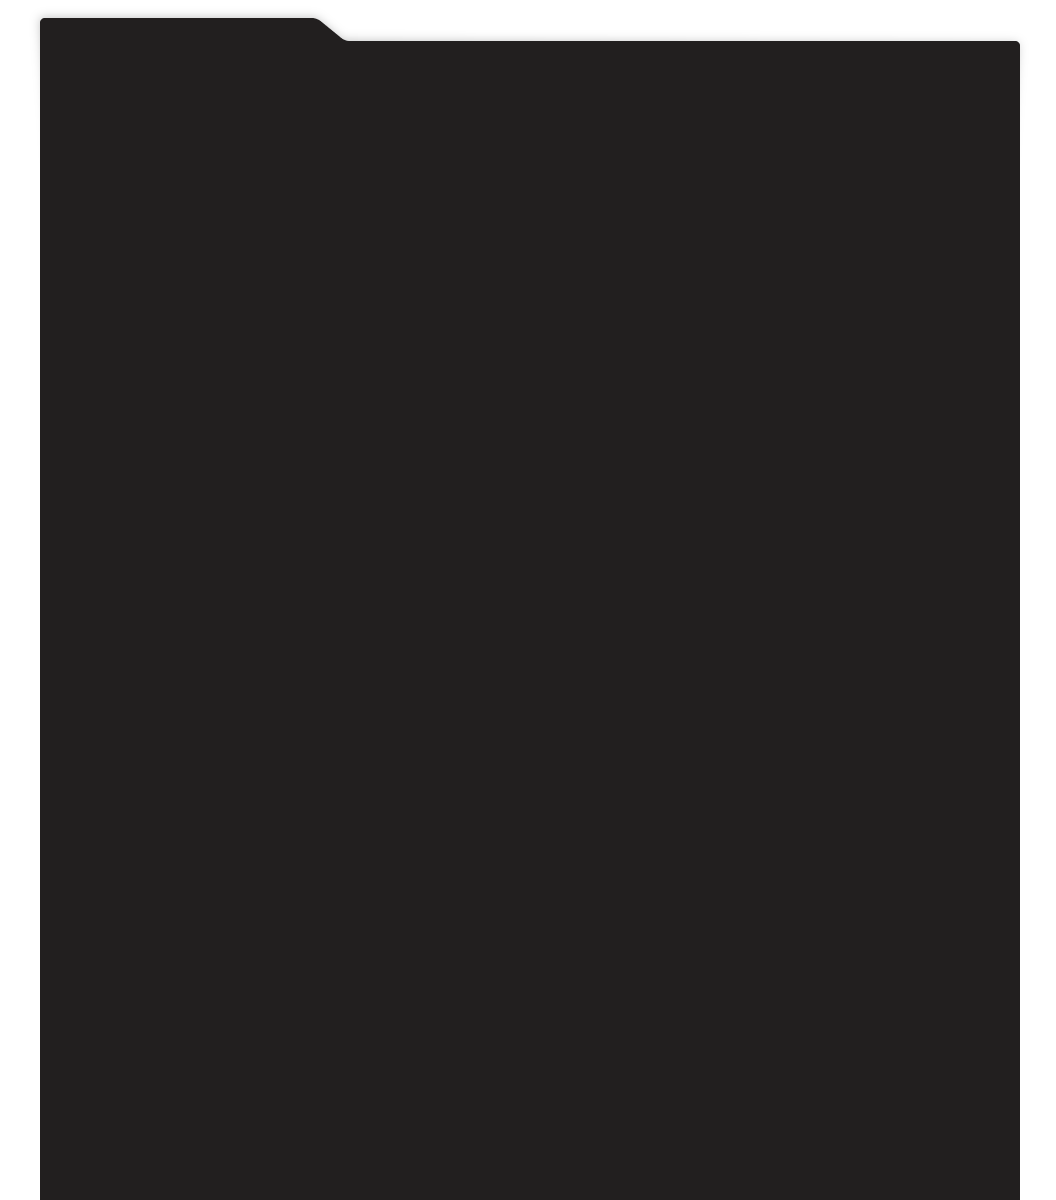
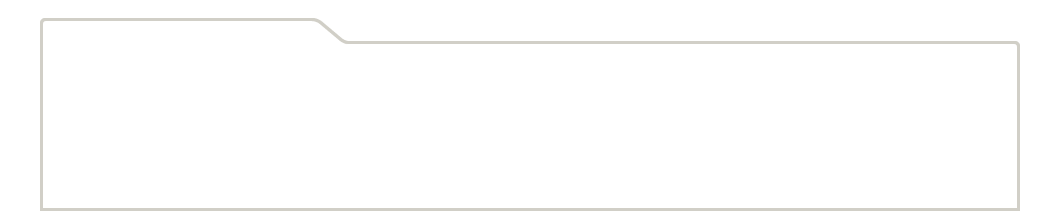
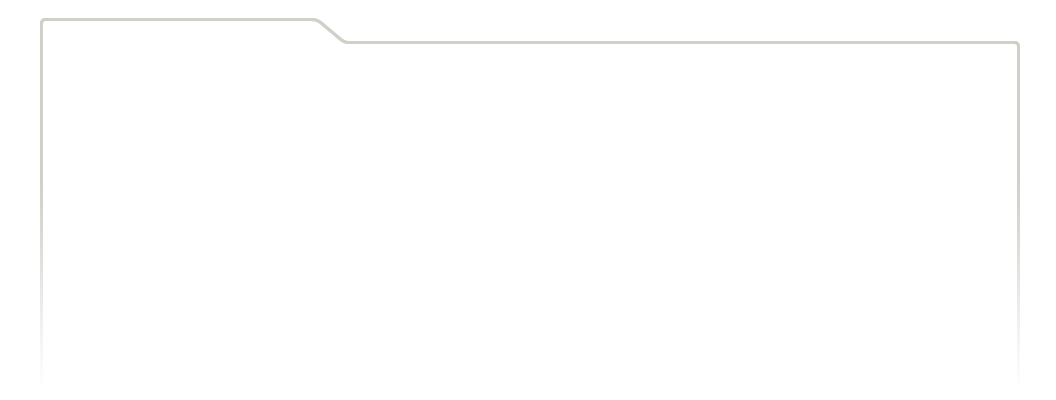
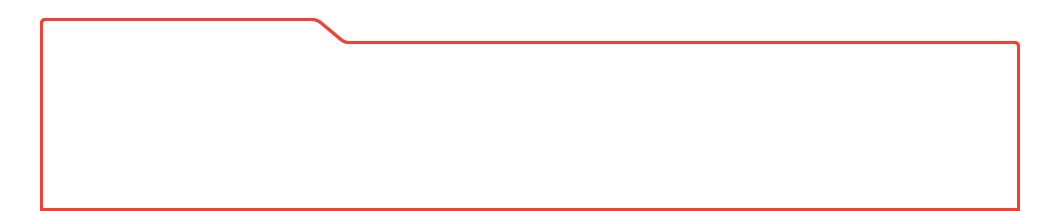
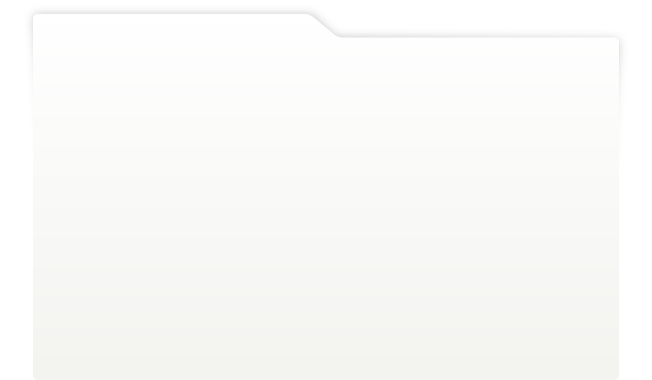
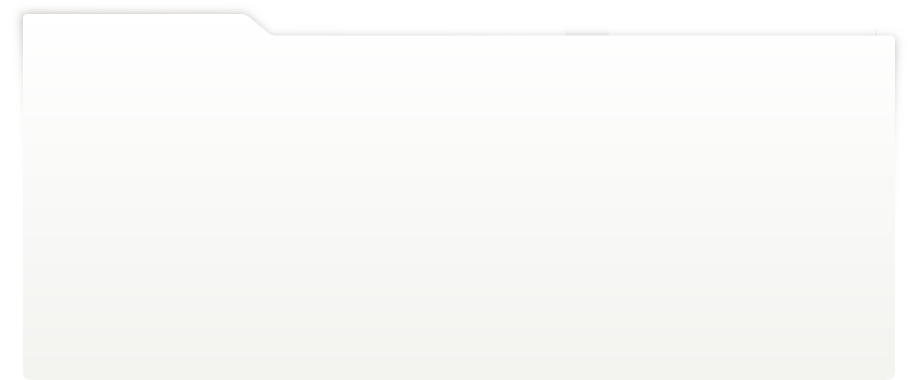
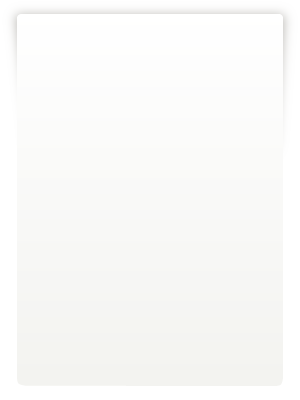
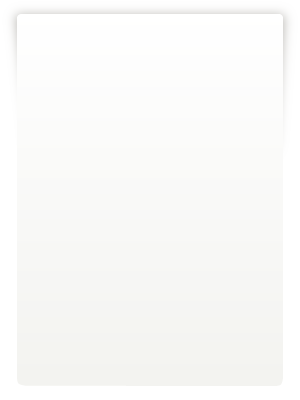
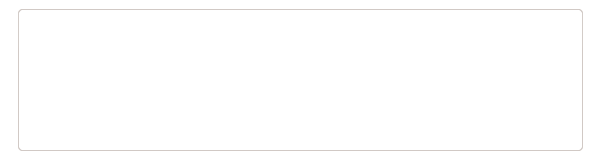
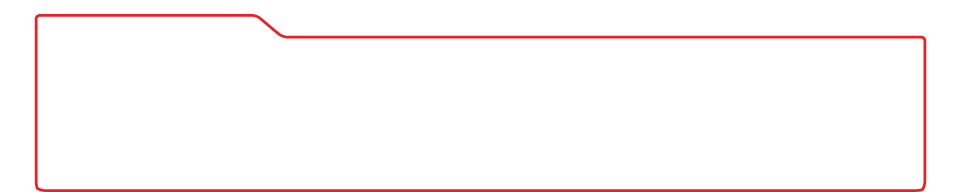
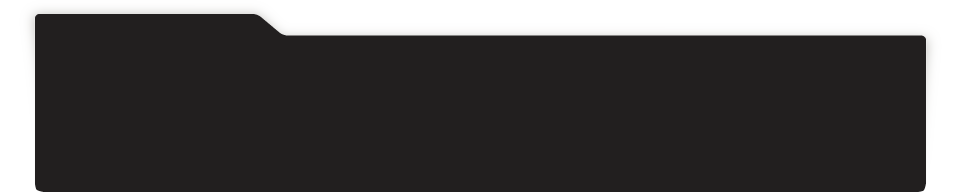
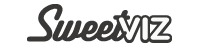
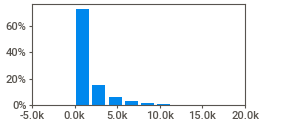
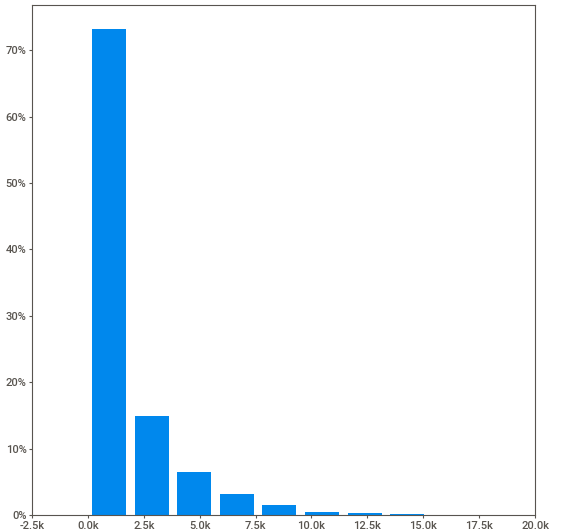
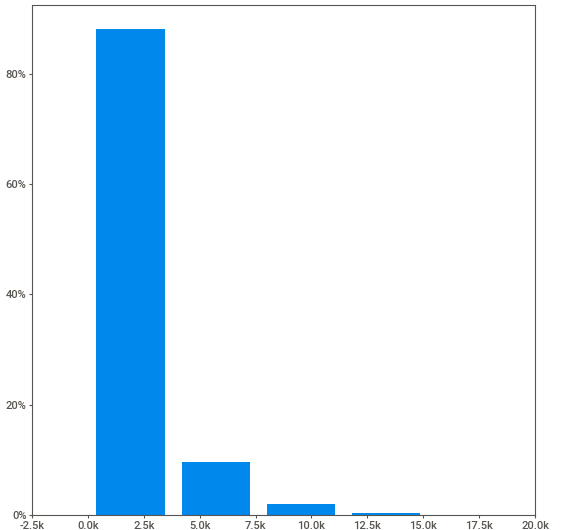
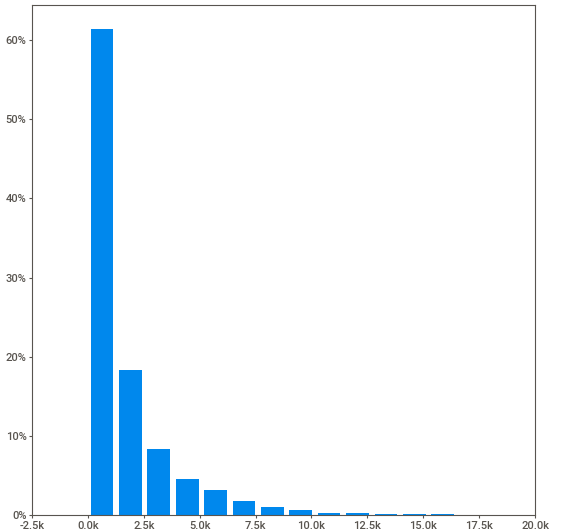
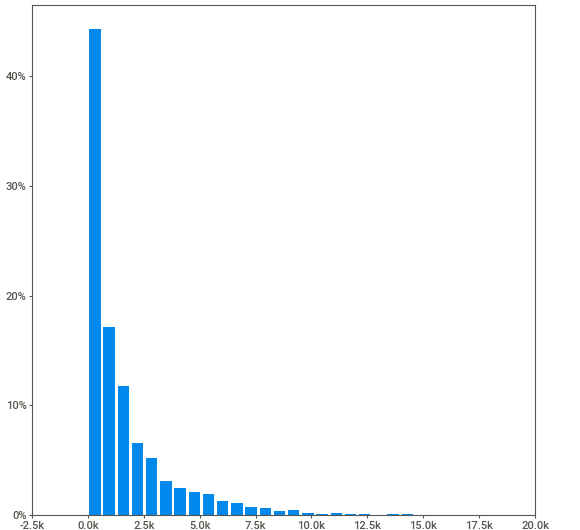
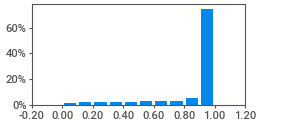
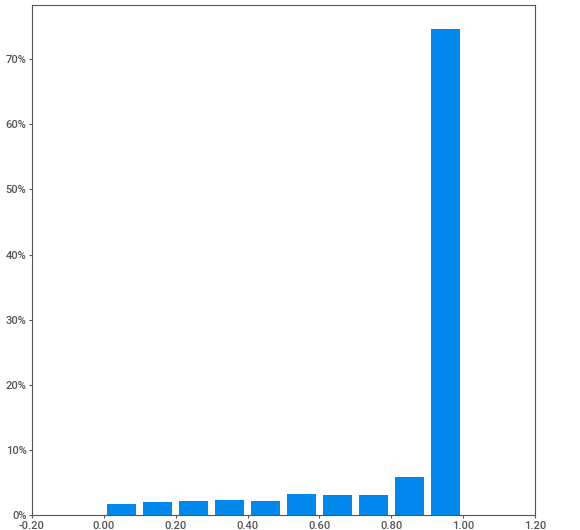
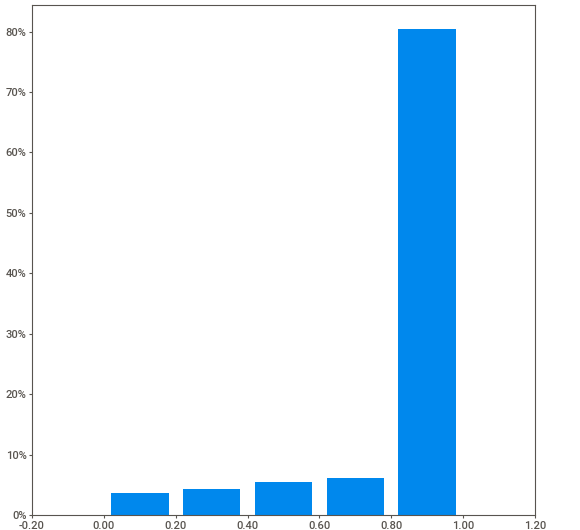
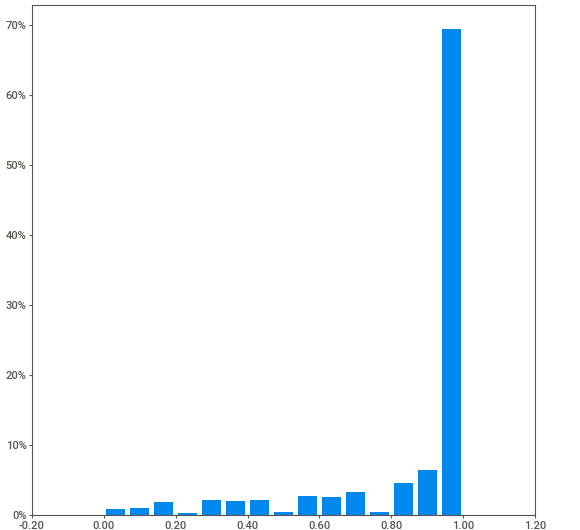
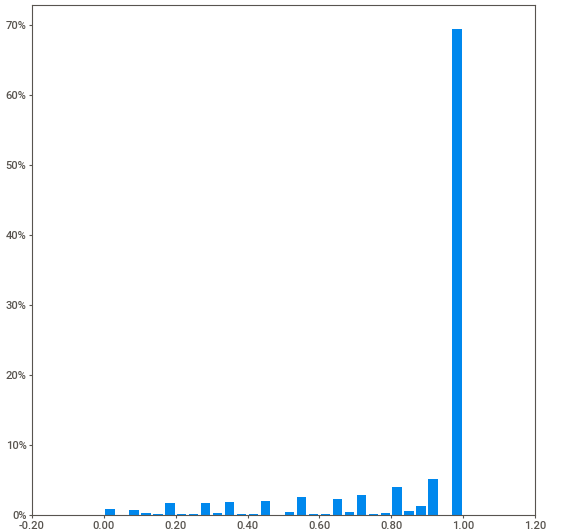
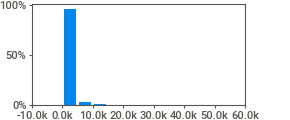
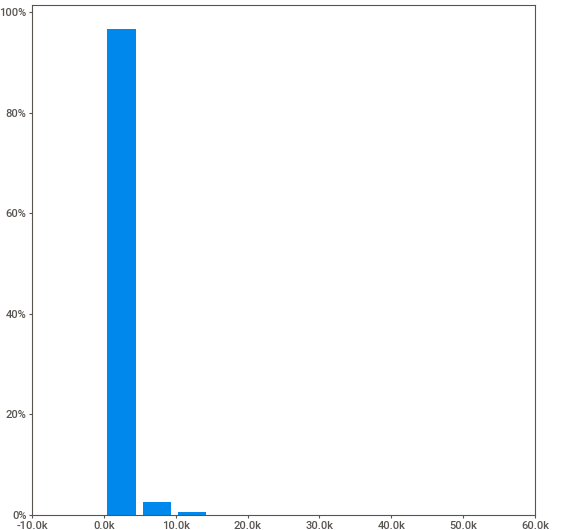
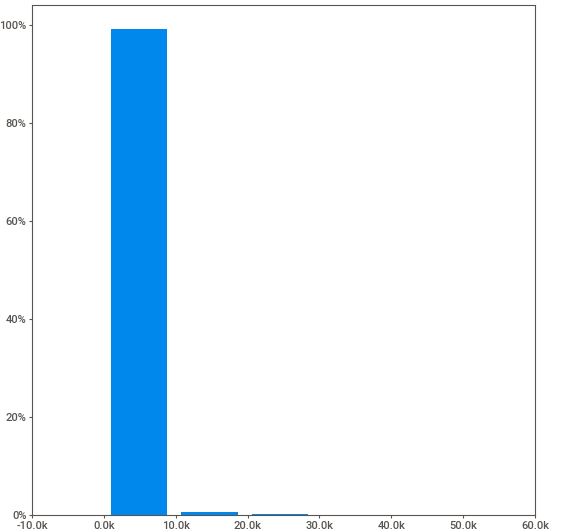
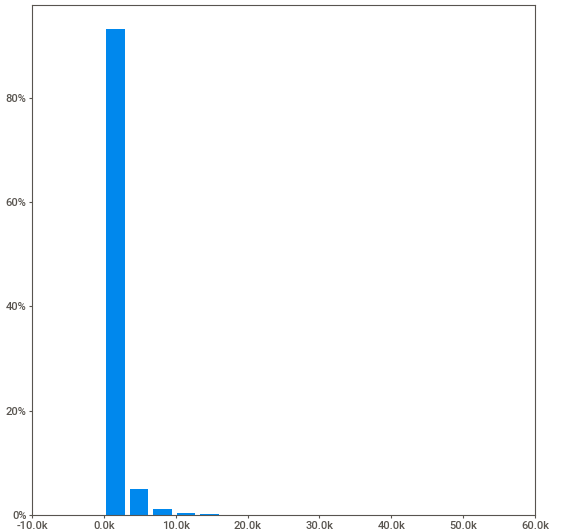
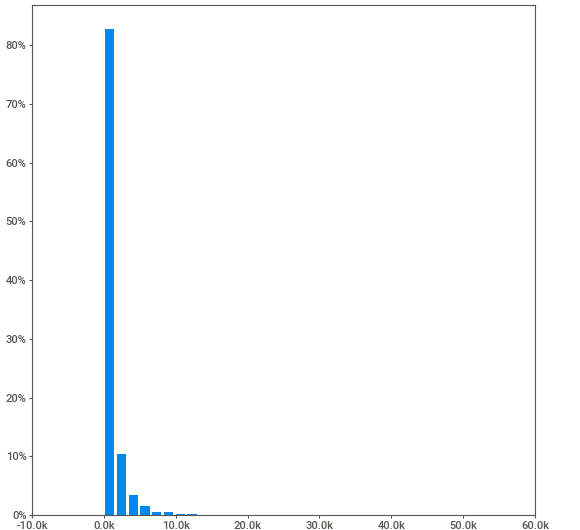
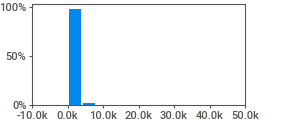
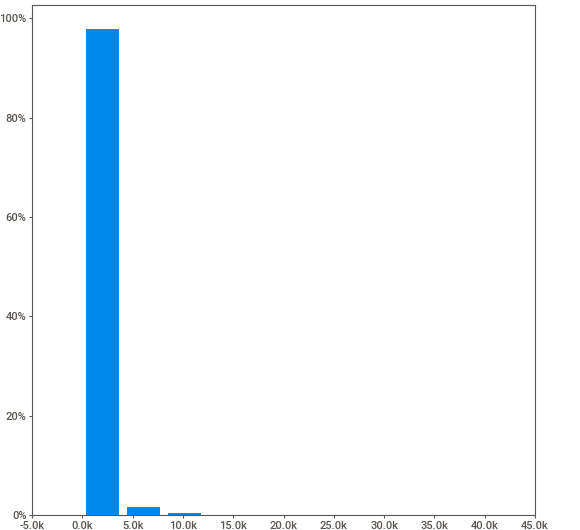
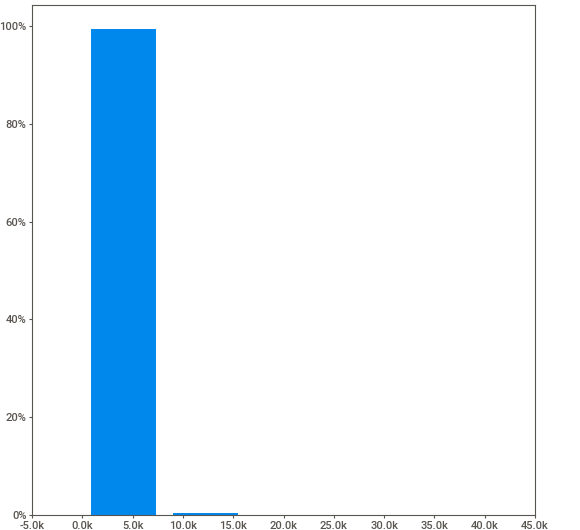
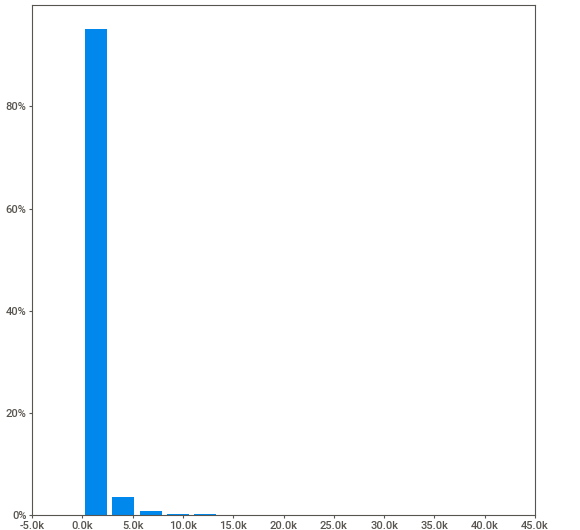
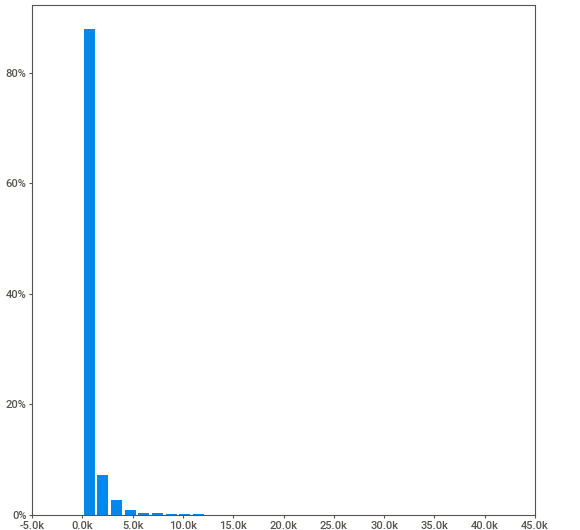
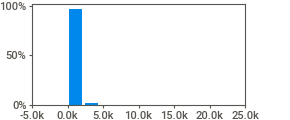
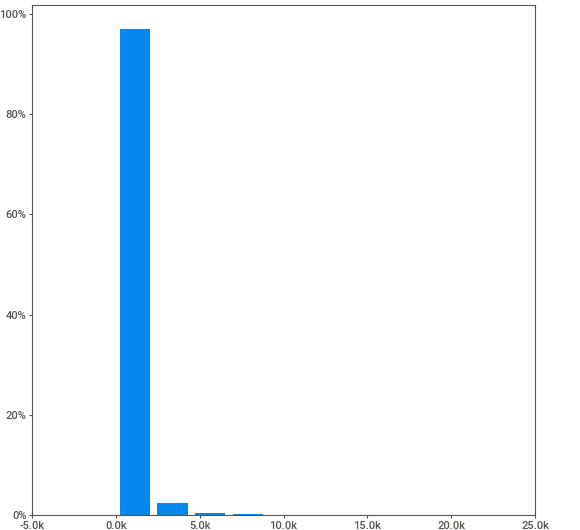
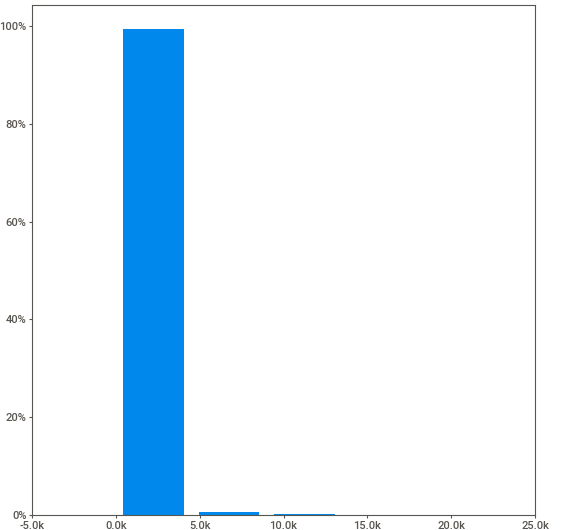
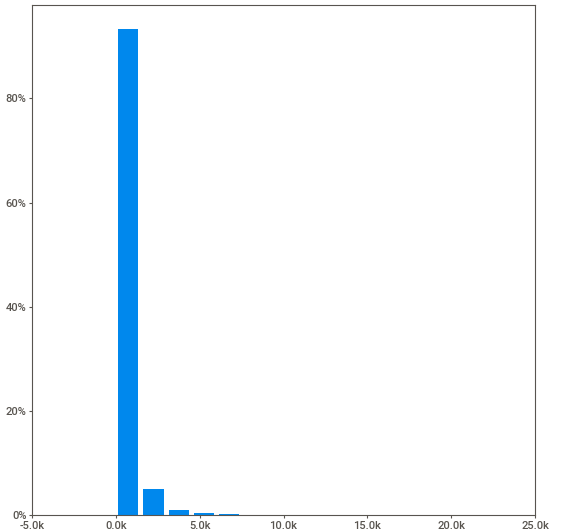
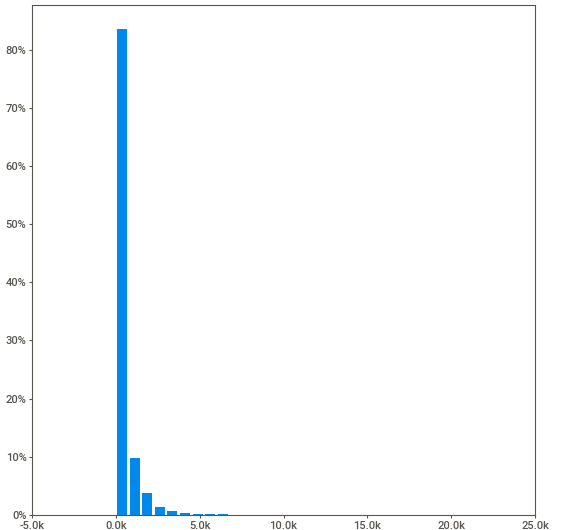
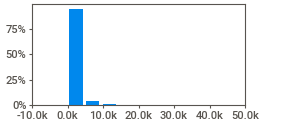
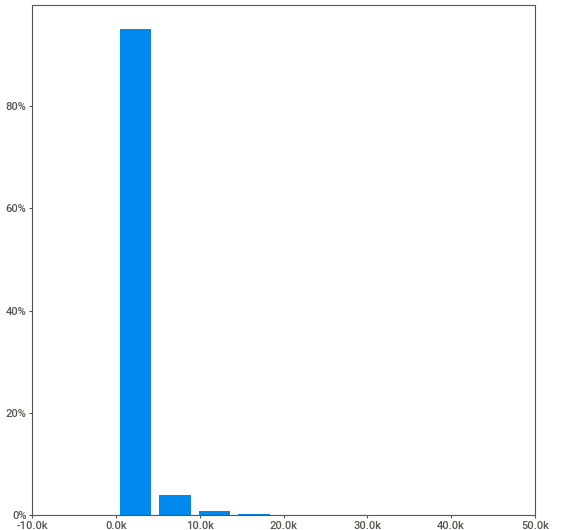
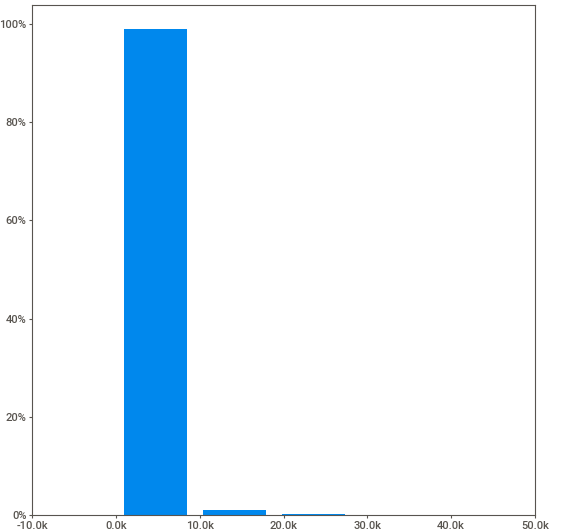
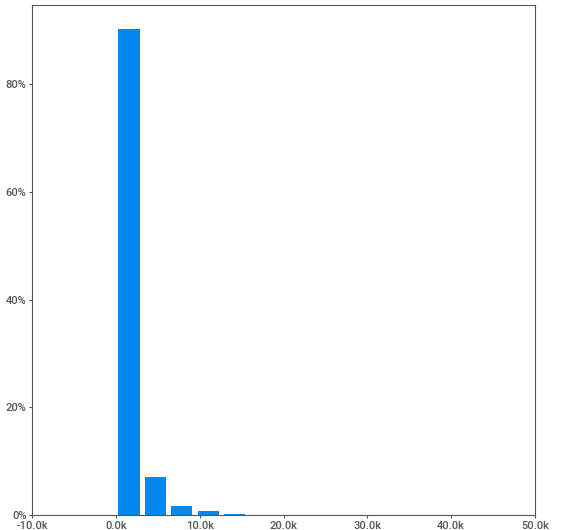
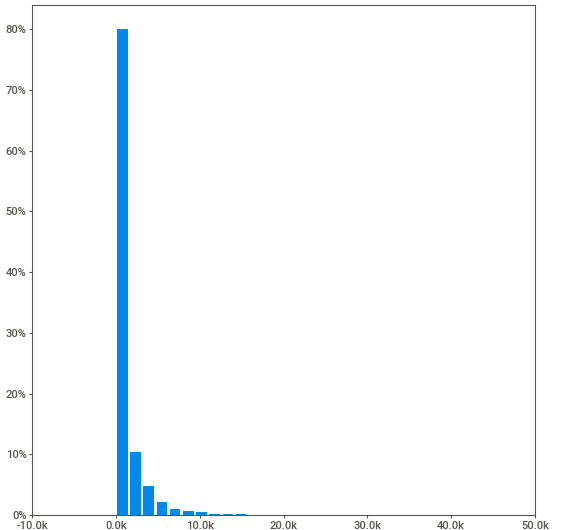
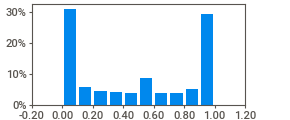
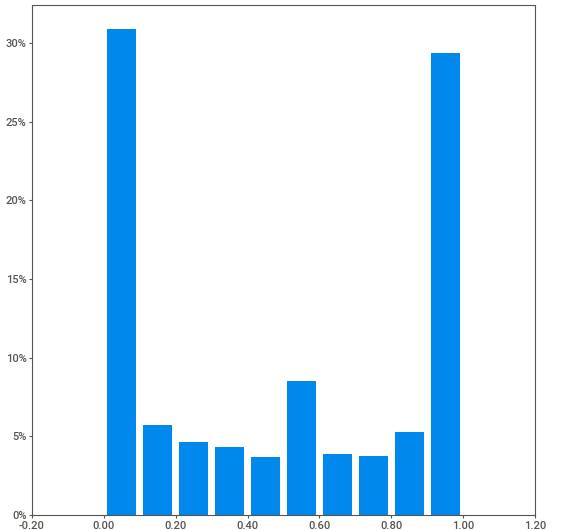
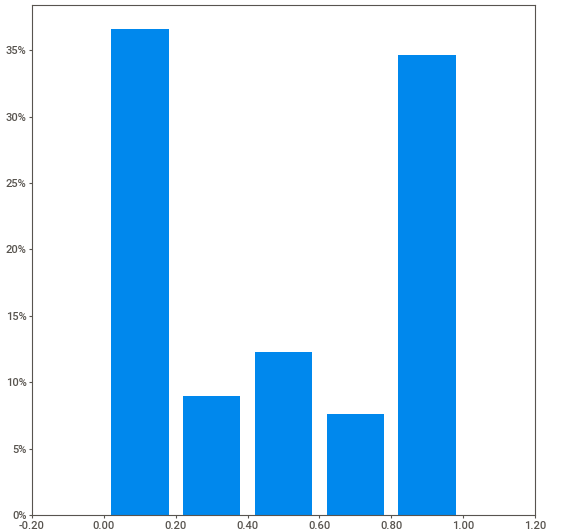
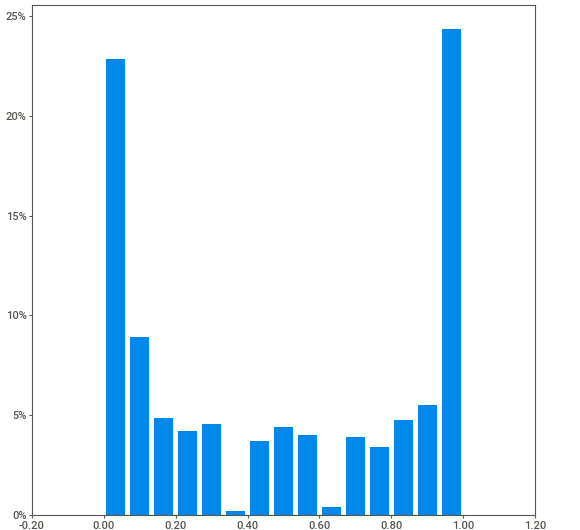
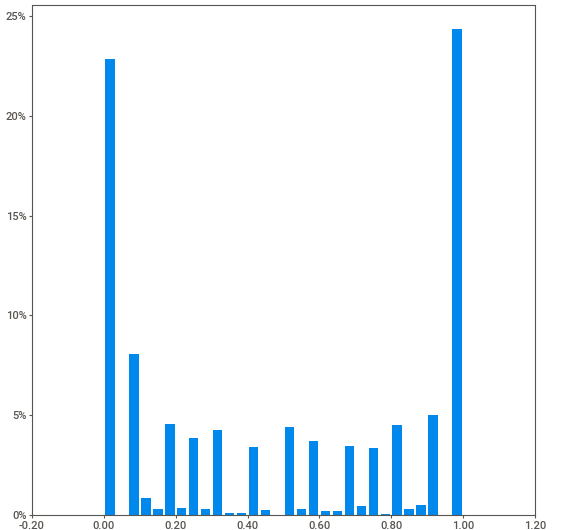
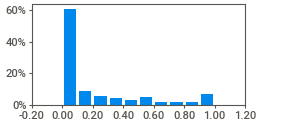
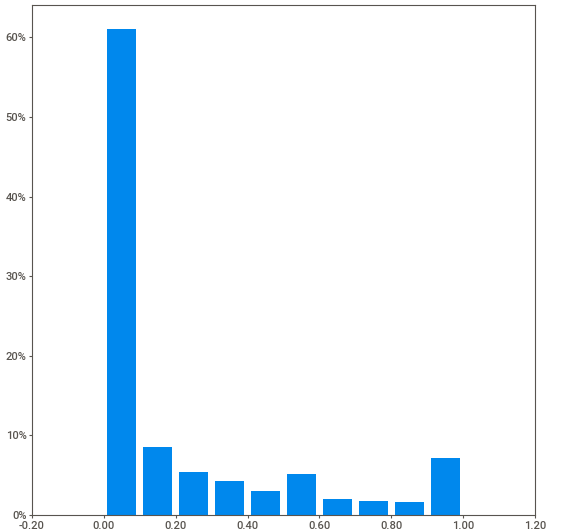
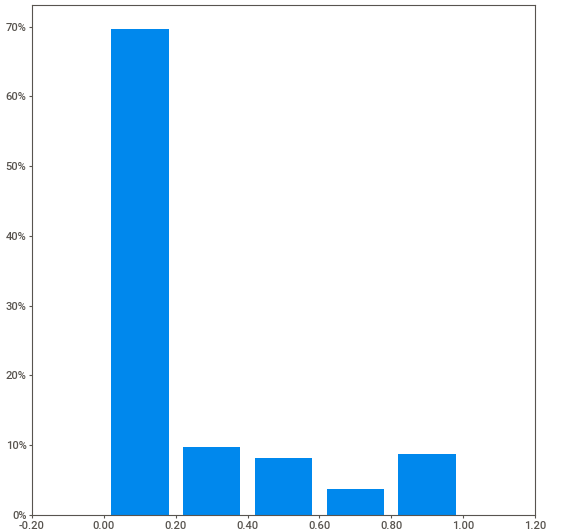
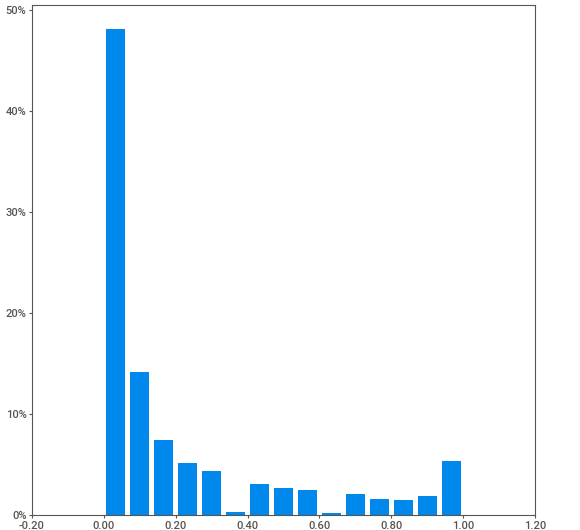
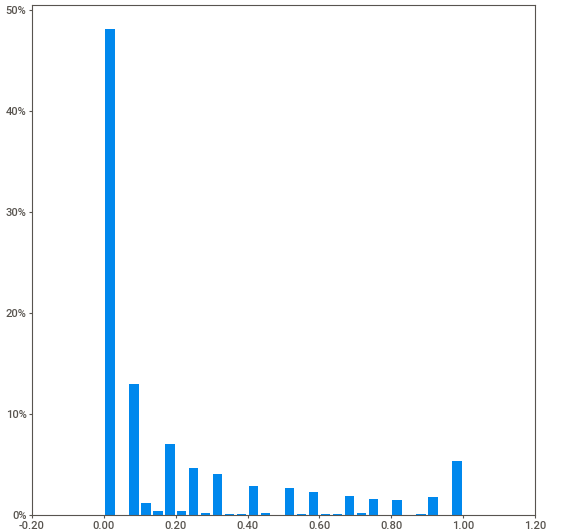
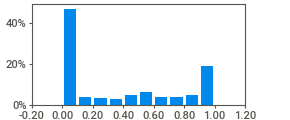
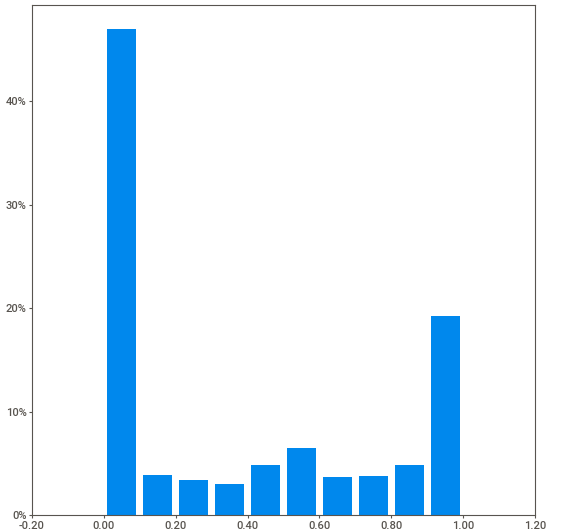
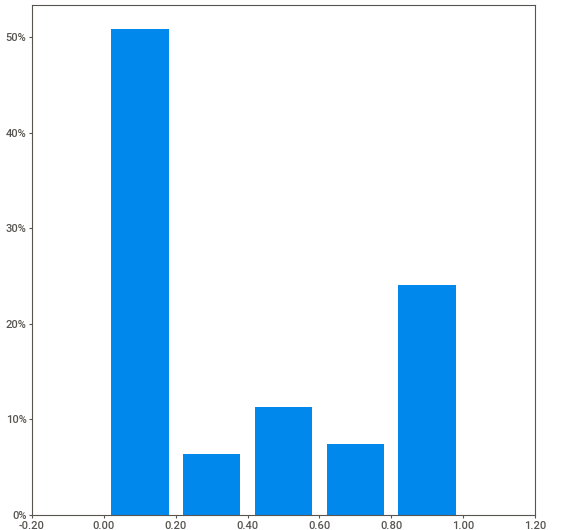
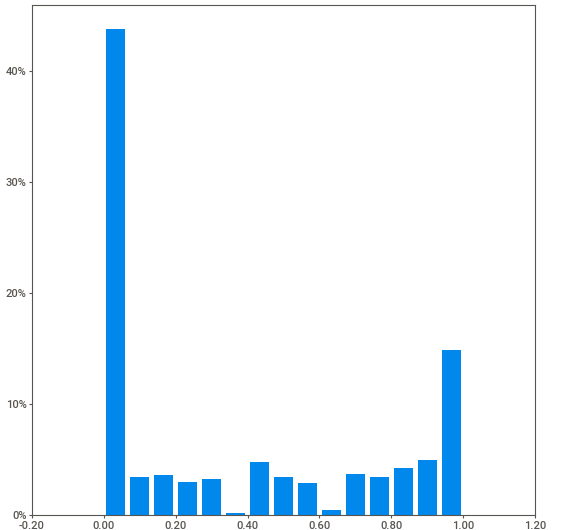
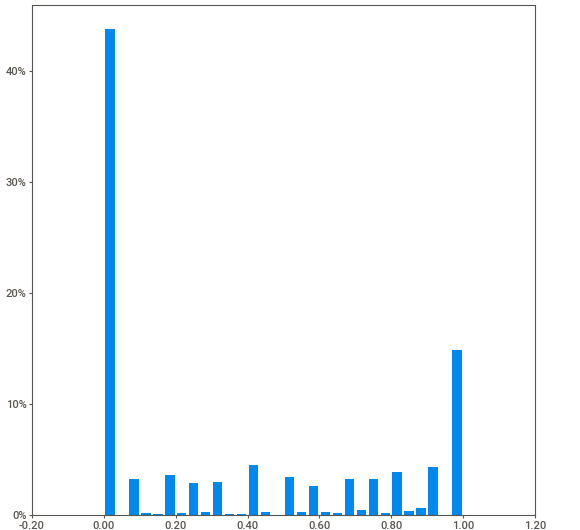
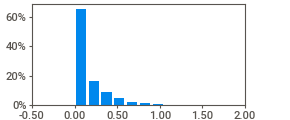
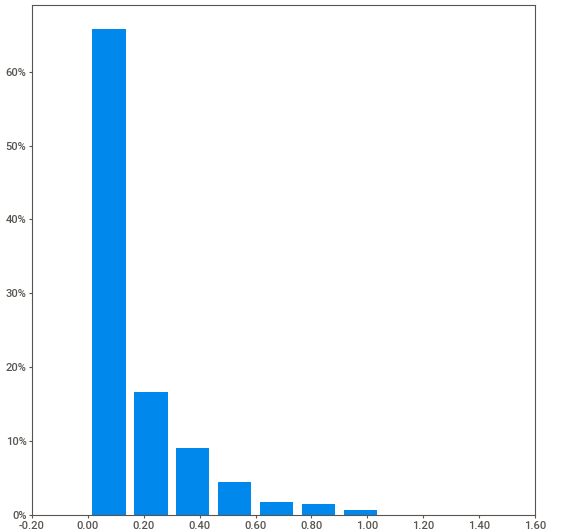
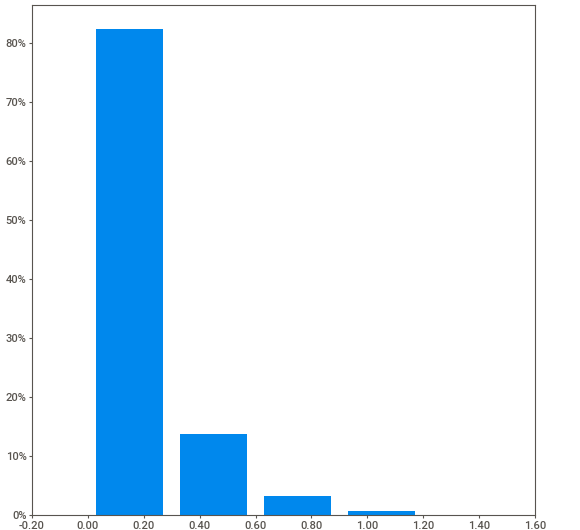
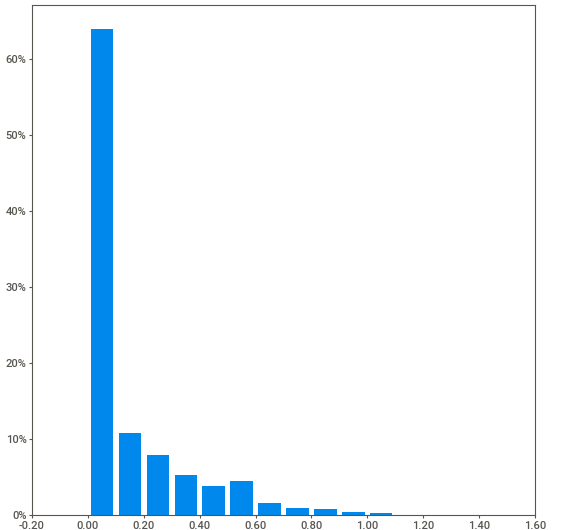
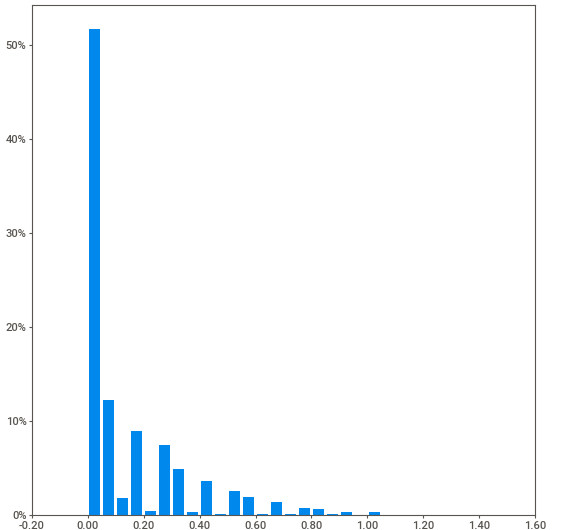
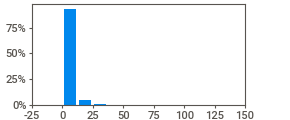
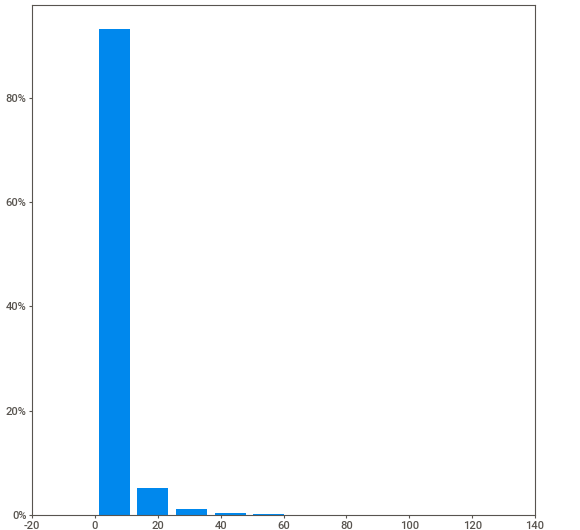
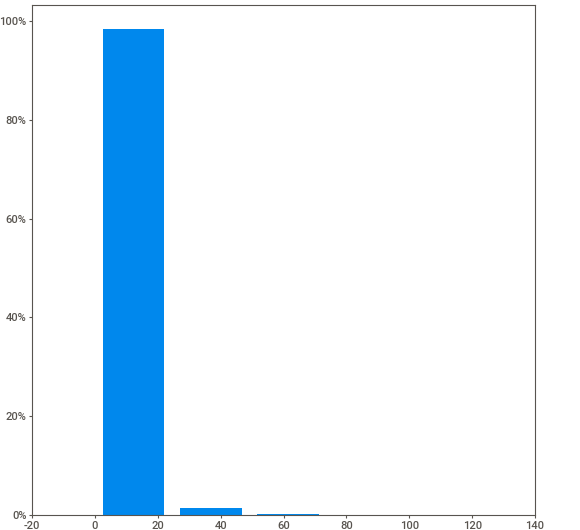
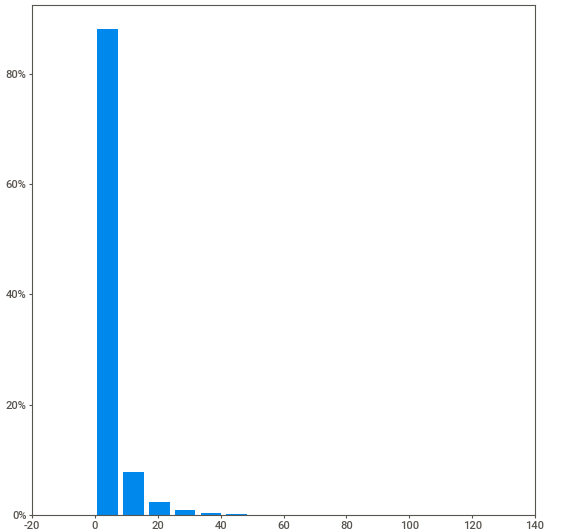
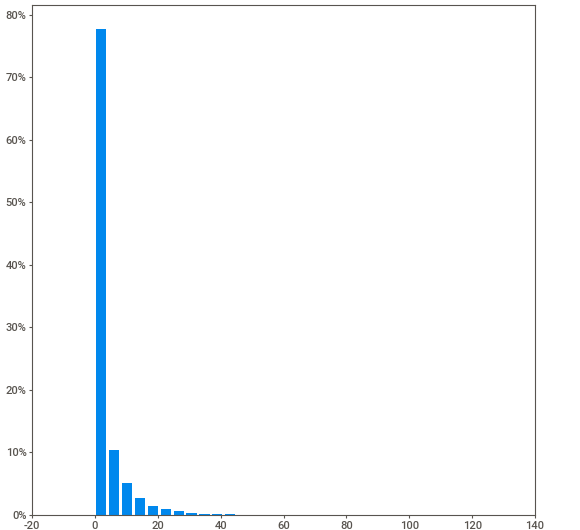
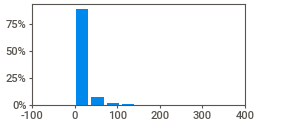
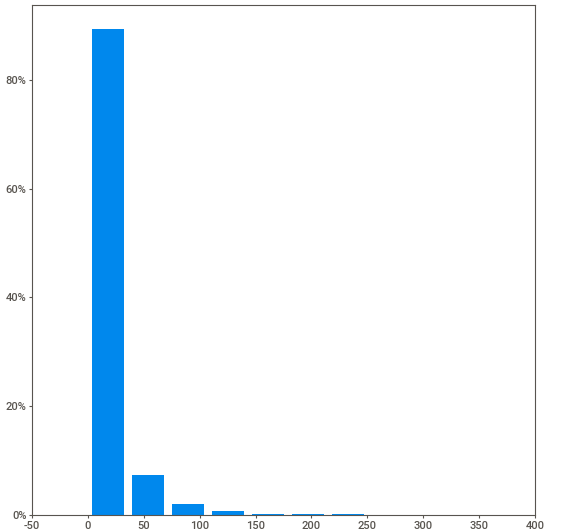
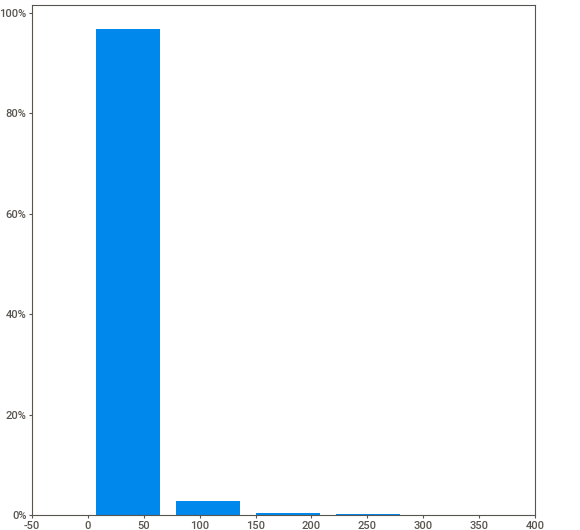
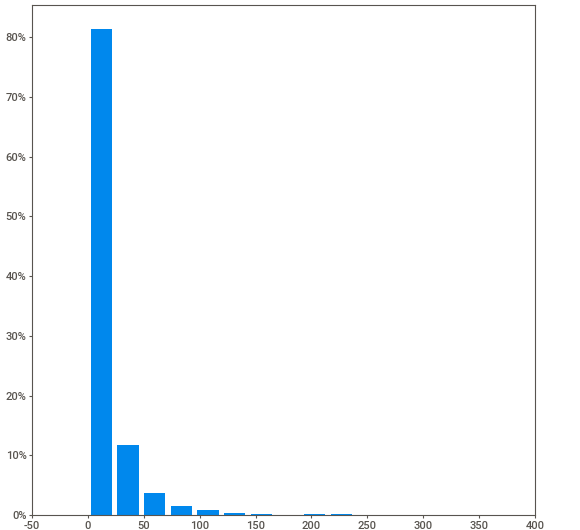
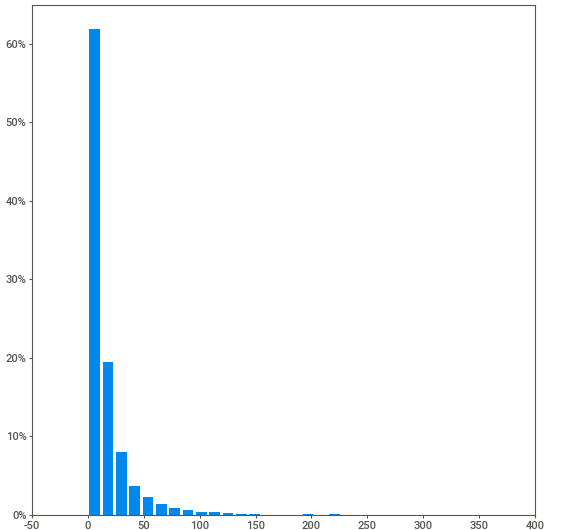
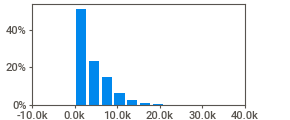
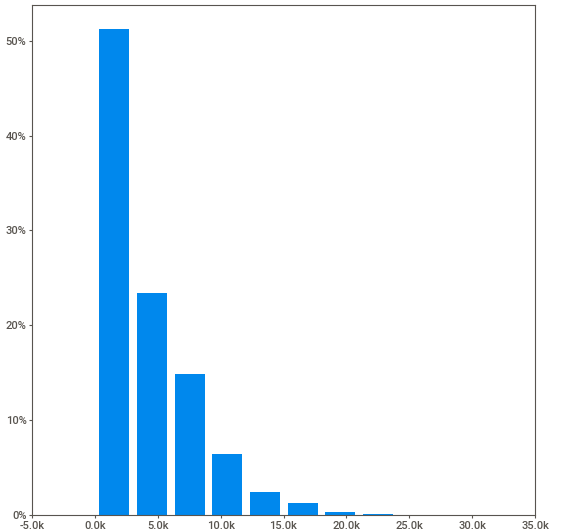
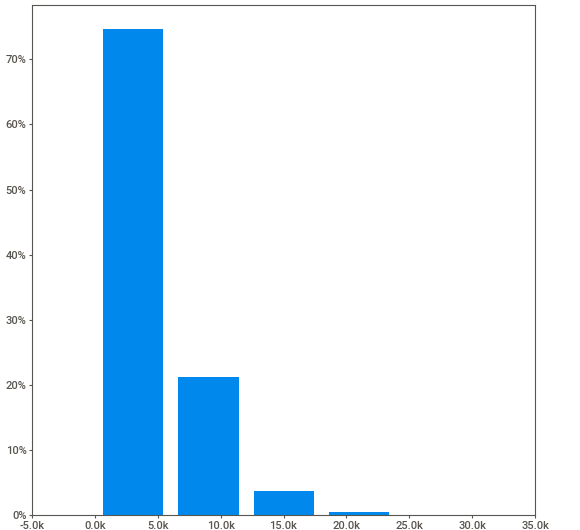
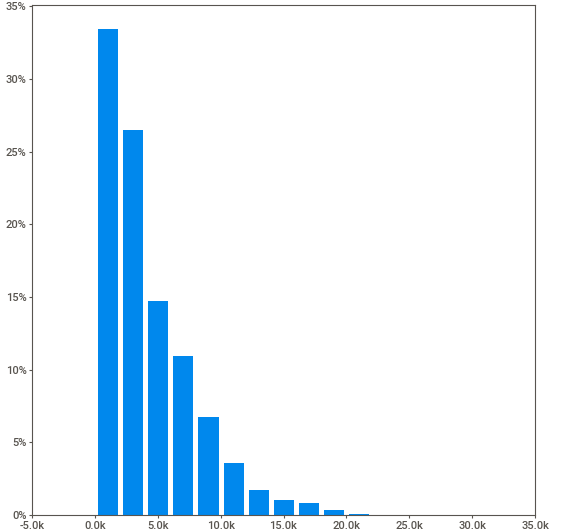
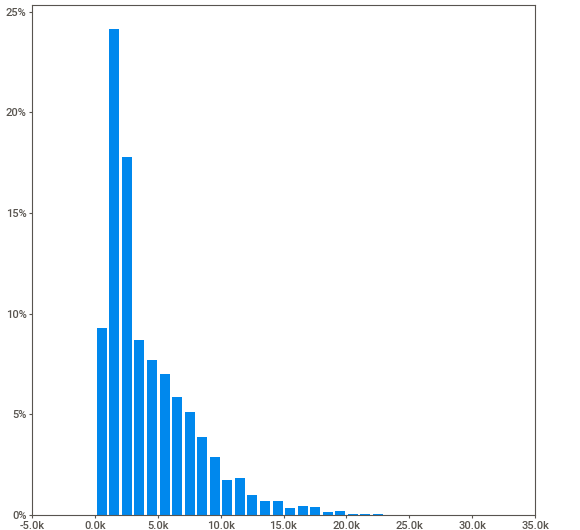
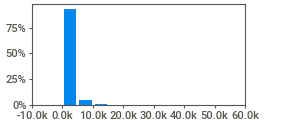
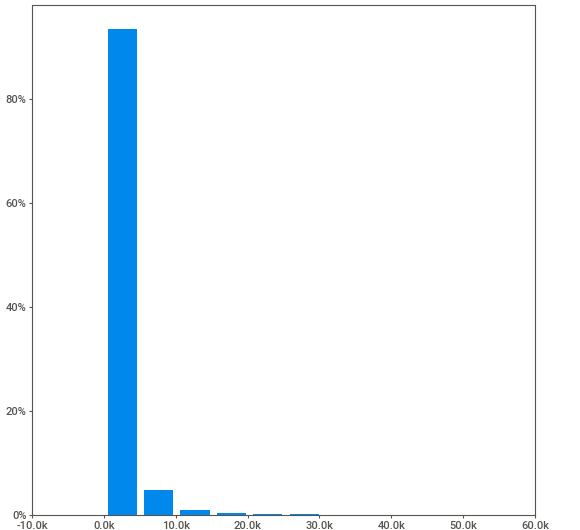
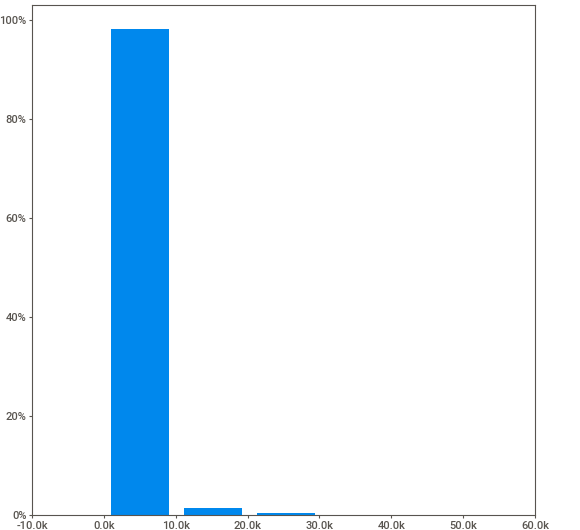
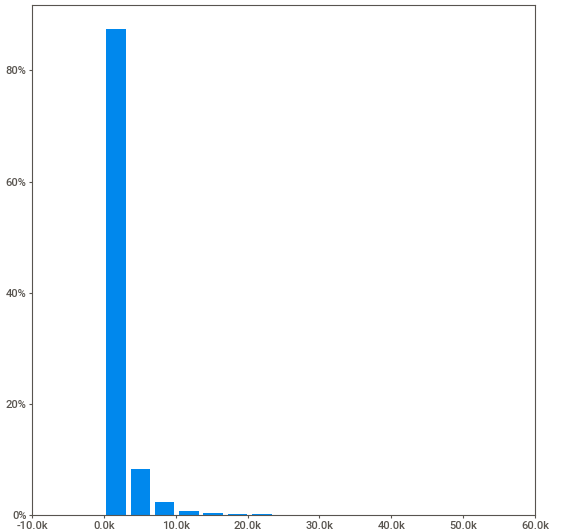
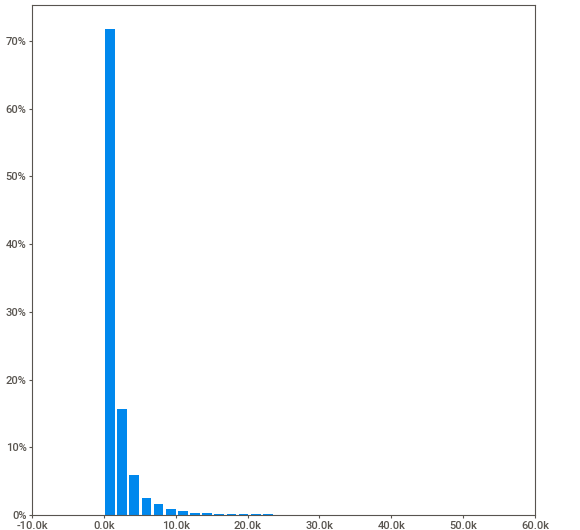
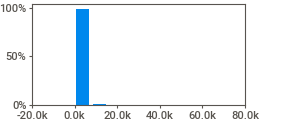
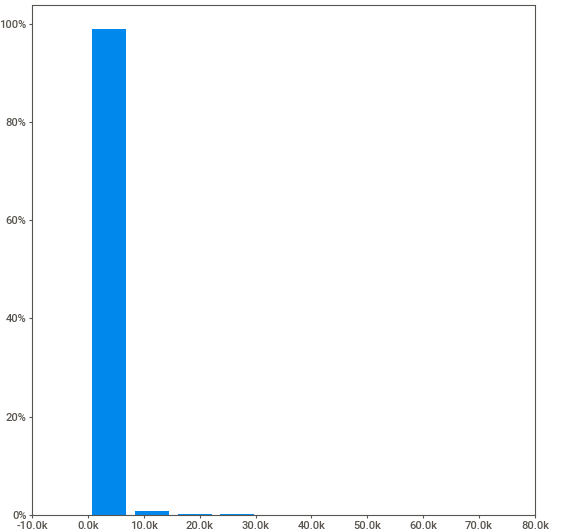
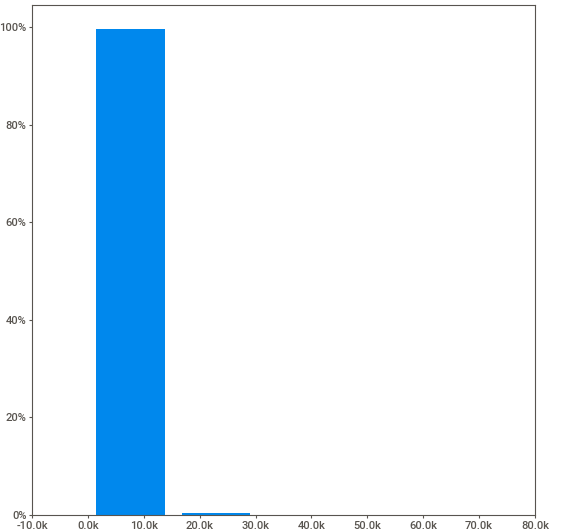
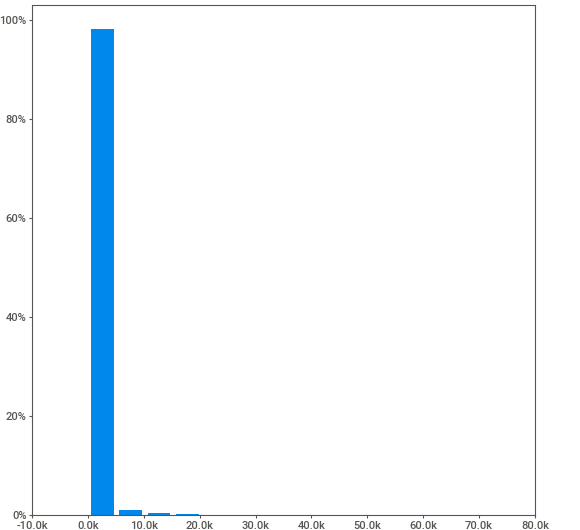
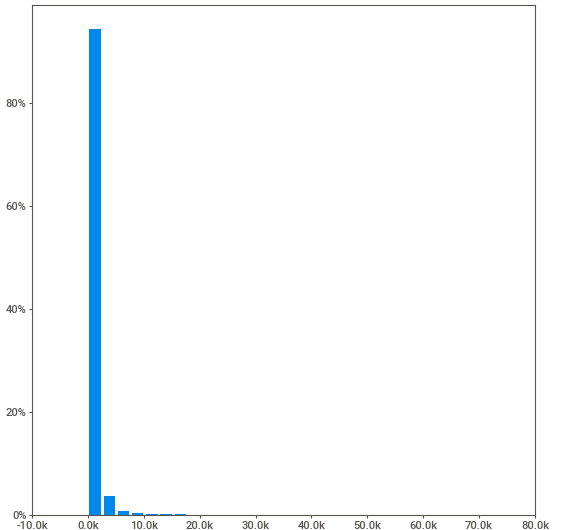
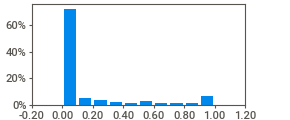
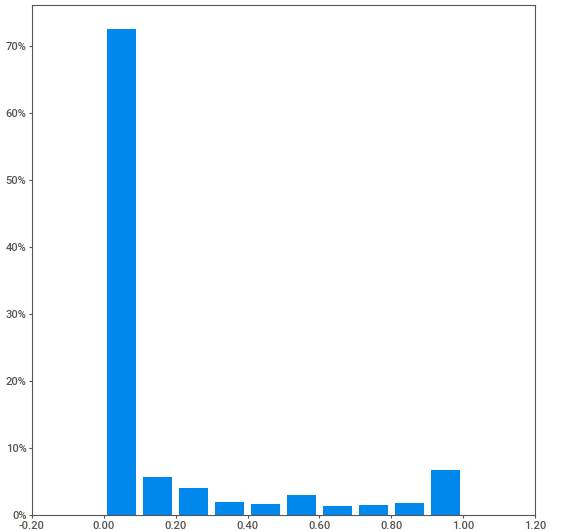
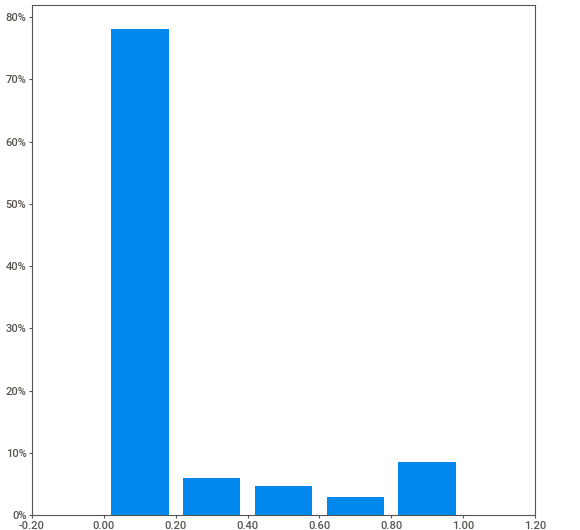
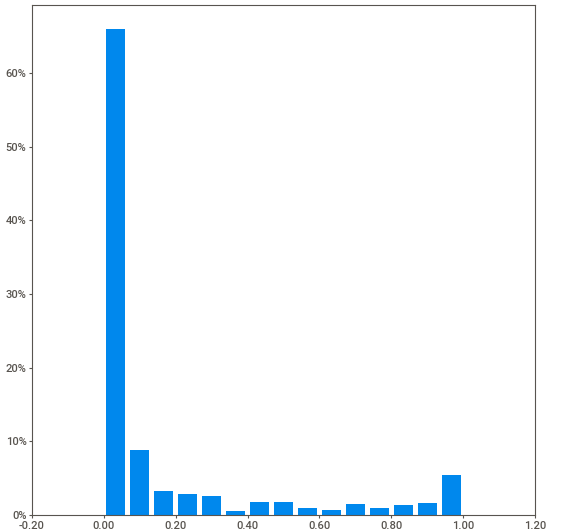
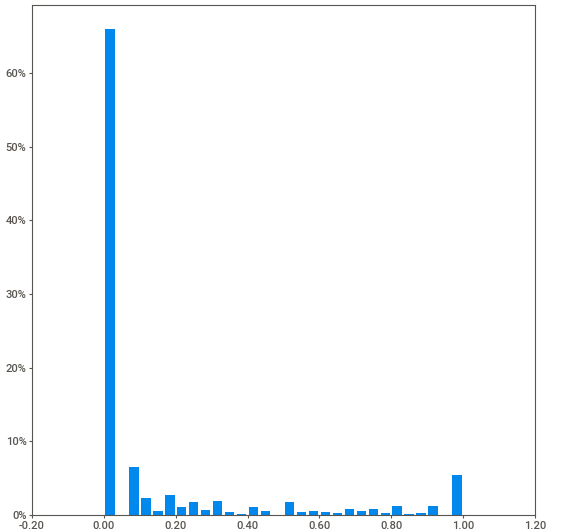
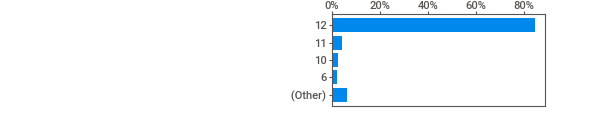
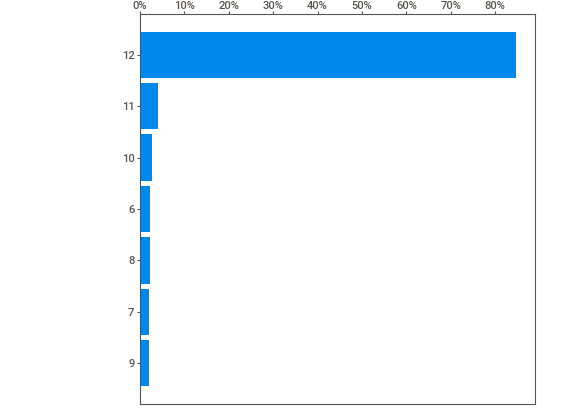
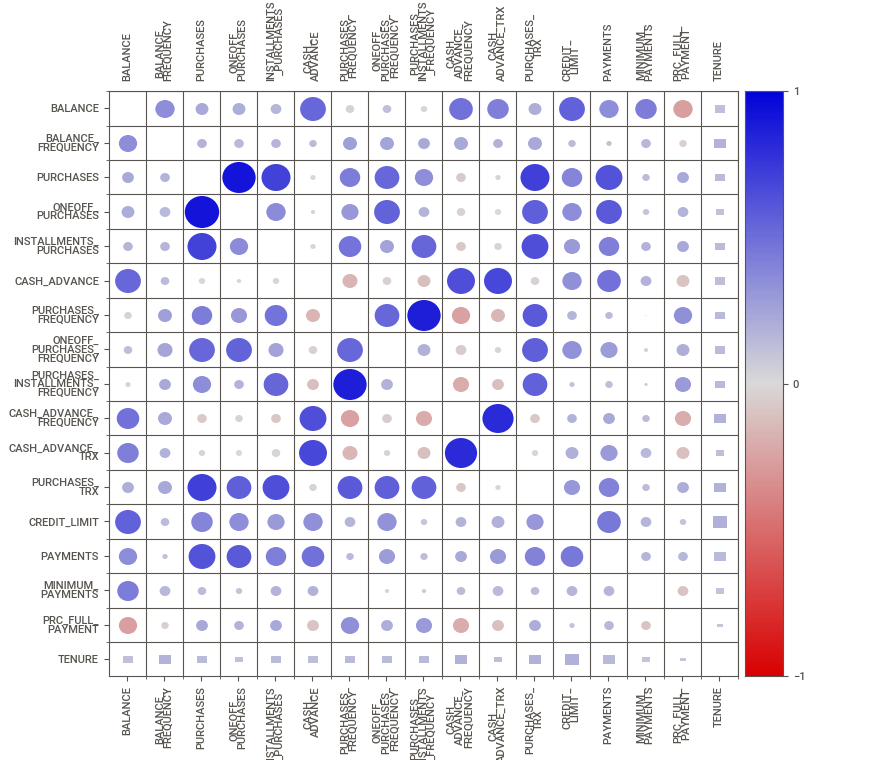
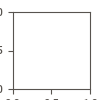

In [ ]:
report = sv.analyze(df)
report.show_notebook()

# Hopkins Statistic

In [ ]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
from random import sample

def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) # heuristic from article [1]
    nbrs = NearestNeighbors(n_neighbors=1).fit(X)


    rand_X = sample(range(0, n, 1), m)

    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(np.random.uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X[rand_X[j]].reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])

    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if np.isnan(H):

        print(ujd, wjd)
        H = 0

    return H


In [ ]:
hopkins_score = hopkins(df_scaled)
print(hopkins_score)

0.966915298585723


1. hopkins score > 0.7 :- is good for clusturing due to less randomness in the data
2. hopkinsscore < 0.5 :- is bad for clusturing b/c due to randomness in the data\

# IQR for outliars

In [ ]:
outlier_percentage = {}
for feature in df:
    tempData = df.sort_values(by=feature)[feature]
    Q1, Q3 = tempData.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    Lower_range = Q1 - (1.5 * IQR)
    Upper_range = Q3 + (1.5 * IQR)

    outlier_count = ((tempData < Lower_range) | (tempData > Upper_range)).sum()
    outlier_perc = round((outlier_count / tempData.shape[0]) * 100, 2)
    outlier_percentage[feature] = outlier_perc

outlier_percentage

{'BALANCE': 7.77,
 'BALANCE_FREQUENCY': 16.68,
 'PURCHASES': 9.03,
 'ONEOFF_PURCHASES': 11.32,
 'INSTALLMENTS_PURCHASES': 9.69,
 'CASH_ADVANCE': 11.51,
 'PURCHASES_FREQUENCY': 0.0,
 'ONEOFF_PURCHASES_FREQUENCY': 8.74,
 'PURCHASES_INSTALLMENTS_FREQUENCY': 0.0,
 'CASH_ADVANCE_FREQUENCY': 5.87,
 'CASH_ADVANCE_TRX': 8.98,
 'PURCHASES_TRX': 8.56,
 'CREDIT_LIMIT': 2.77,
 'PAYMENTS': 9.03,
 'MINIMUM_PAYMENTS': 8.65,
 'PRC_FULL_PAYMENT': 16.47,
 'TENURE': 15.26}

# converting normal columns into categorical columns

In [ ]:
def preprocess_data(data):
    feature_boundaries = {
        'BALANCE': [0, 500, 1000, 3000, 5000, 10000],
        'PURCHASES': [0, 500, 1000, 3000, 5000, 10000],
        'ONEOFF_PURCHASES': [0, 500, 1000, 3000, 5000, 10000],
        'INSTALLMENTS_PURCHASES': [0, 500, 1000, 3000, 5000, 10000],
        'CASH_ADVANCE': [0, 500, 1000, 3000, 5000, 10000],
        'CREDIT_LIMIT': [0, 500, 1000, 3000, 5000, 10000],
        'PAYMENTS': [0, 500, 1000, 3000, 5000, 10000],
        'MINIMUM_PAYMENTS': [0, 500, 1000, 3000, 5000, 10000]
    }

    frequency_boundaries = {
        'BALANCE_FREQUENCY': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
        'PURCHASES_FREQUENCY': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
        'ONEOFF_PURCHASES_FREQUENCY': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
        'PURCHASES_INSTALLMENTS_FREQUENCY': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
        'CASH_ADVANCE_FREQUENCY': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
        'PRC_FULL_PAYMENT': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
    }

    trx_boundaries = {
        'PURCHASES_TRX': [0, 5, 10, 15, 20, 30, 50, 100],
        'CASH_ADVANCE_TRX': [0, 5, 10, 15, 20, 30, 50, 100]
    }

    def assign_range(column, boundaries):
        new_column = column + '_RANGE'
        data[new_column] = 0
        for idx, boundary in enumerate(boundaries):
            if idx == len(boundaries) - 1:
                data.loc[data[column] > boundary, new_column] = idx + 1
            else:
                data.loc[(data[column] > boundary) & (data[column] <= boundaries[idx + 1]), new_column] = idx + 1

    for column, boundaries in feature_boundaries.items():
        assign_range(column, boundaries)

    for column, boundaries in frequency_boundaries.items():
        assign_range(column, boundaries)

    for column, boundaries in trx_boundaries.items():
        assign_range(column, boundaries)

    columns_to_drop = [
        'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
        'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
        'PURCHASES_FREQUENCY',  'ONEOFF_PURCHASES_FREQUENCY',
        'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
        'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
        'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT'
    ]
    df_wo = df.drop(columns=columns_to_drop)

    return df_wo


In [ ]:
df_wo = preprocess_data(df)

# Clusturing Models

In [ ]:
results = {
    "KMeans": {
        "normal": {},
        "umap": {},
        "pca": {},
        "outlier_free": {}
    },
    "DBSCAN": {
        "normal": {},
        "umap": {},
        "pca": {}
    },
    "OPTICS": {
        "normal": {},
        "umap": {},
        "pca": {}
    }
}

# 1. K-Means

1. Elbow Point: When examining the WCSS graph blue line, look for the k value where WCSS does not decrease significantly. This point can serve as a clue to determine the optimal k value.

2. Silhouette Score: When examining the silhouette score graph orange line, look for the k value with the highest score. A high silhouette score indicates well-defined clusters.

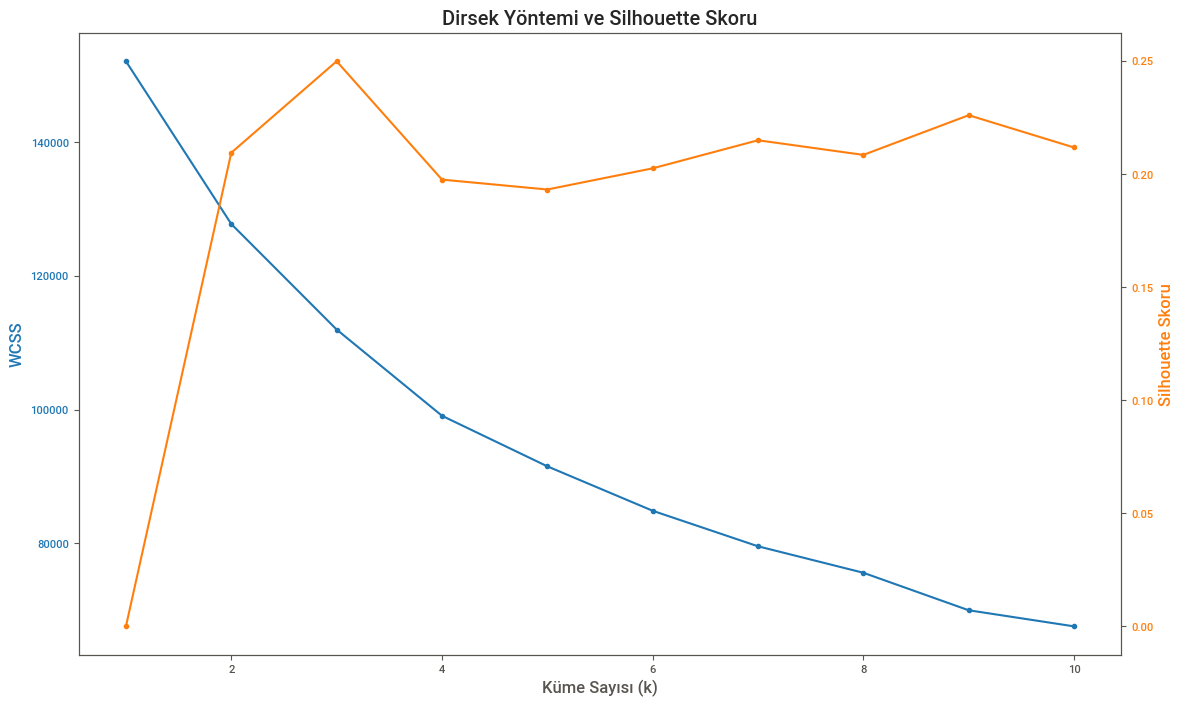

In [ ]:
k_values = range(1, 11)
wcss = []
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
    if k > 1:
        silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))
    else:
        silhouette_scores.append(0)

fig, ax1 = plt.subplots(figsize=(12, 7))


ax1.set_xlabel('Küme Sayısı (k)')
ax1.set_ylabel('WCSS', color='tab:blue')
ax1.plot(k_values, wcss, 'o-', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Silhouette Skoru', color='tab:orange')
ax2.plot(k_values, silhouette_scores, 'o-', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

fig.tight_layout()
plt.title('Dirsek Yöntemi ve Silhouette Skoru')
plt.show()

K = 4 is finalised

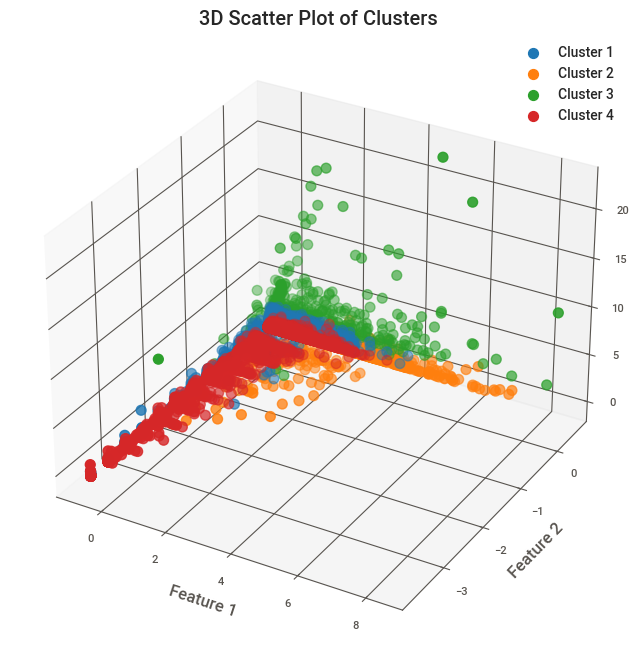

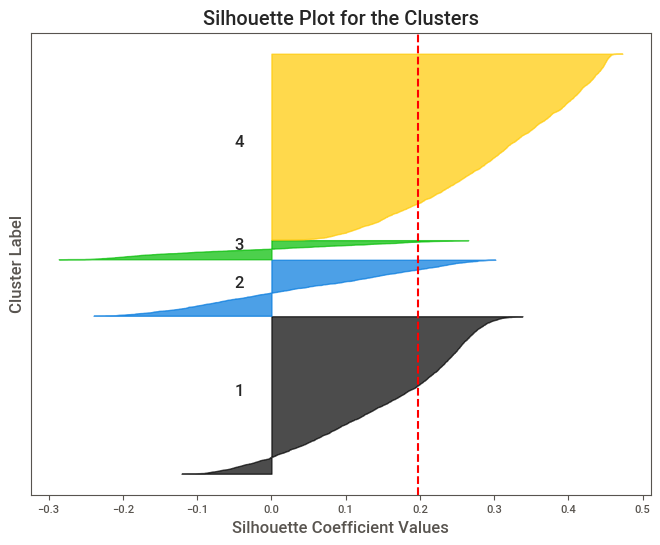

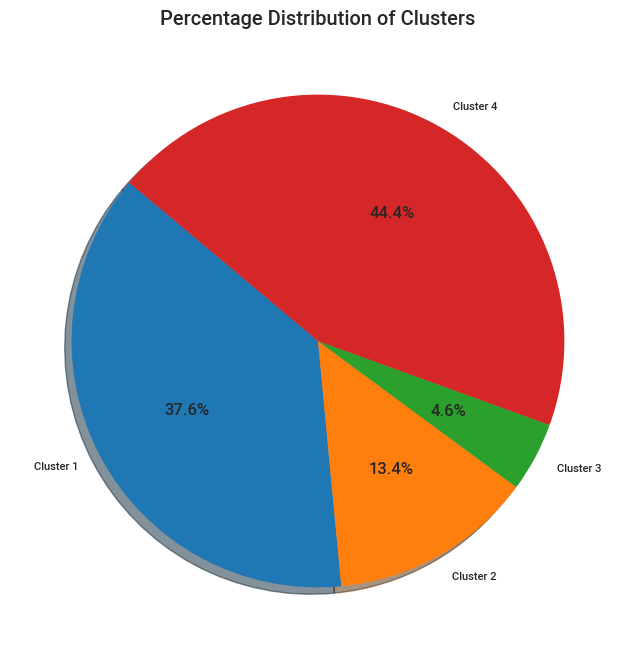

In [ ]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(df_scaled)
labels = kmeans.labels_

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

for i, color in enumerate(colors):
    ax.scatter(df_scaled[labels == i, 0], df_scaled[labels == i, 1], df_scaled[labels == i, 2],
               c=color, label=f'Cluster {i+1}', s=50)

ax.set_title("3D Scatter Plot of Clusters")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")
ax.legend()
plt.show()

silhouette_vals = silhouette_samples(df_scaled, labels)

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
y_lower = 10

for i in range(4):
    ith_cluster_silhouette_values = silhouette_vals[labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / 4)
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                     0, ith_cluster_silhouette_values,
                     facecolor=color, edgecolor=color, alpha=0.7)


    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i+1))

    y_lower = y_upper + 10

ax.set_title("Silhouette Plot for the Clusters")
ax.set_xlabel("Silhouette Coefficient Values")
ax.set_ylabel("Cluster Label")
ax.set_yticks([])
ax.axvline(x=silhouette_score(df_scaled, labels), color="red", linestyle="--")
plt.show()

cluster_counts = np.bincount(labels)
total_count = len(labels)
percentages = (cluster_counts / total_count) * 100

plt.figure(figsize=(8, 8))
plt.pie(percentages, labels=[f'Cluster {i+1}' for i in range(4)], colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.title("Percentage Distribution of Clusters")
plt.show()

1. 3D Cluster Distribution Graph: This graph shows how clusters are distributed in a 3-dimensional space in the scaled dataset. Each color represents a different cluster.
Observation: If the clusters are distinctly separated from each other, it indicates that the K-Means algorithm has clustered well.

2. Silhouette Graph: The silhouette graph evaluates how close each data point is to other data points in its own cluster, and how far it is from the nearest other cluster.
Bands: Each band represents a specific cluster. The width of the band represents the number of data points in that cluster, while its height represents the silhouette score.

3. Red Line: Average silhouette score. We can say that clusters with values close to or above this line are well-defined.

Observation: If the bands are near or above the red line and the band widths are similar, it indicates that the clusters are balanced and well-defined.

4.  Cluster Distribution Percentages Graph: This pie chart shows the percentage distribution of data points falling into each cluster.
Observation: If the slices are of similar size, it indicates a balanced distribution of clusters. However, if you see one or more slices significantly larger or smaller than the others, it indicates that certain clusters have more or fewer data points compared to others.

In [ ]:
kmeans = KMeans(n_clusters=3)
labels = kmeans.fit_predict(df_scaled)


results["KMeans"]["normal"]["Silhouette Coefficient"] = silhouette_score(df_scaled, labels)
results["KMeans"]["normal"]["Calinski-Harabasz Index"] = calinski_harabasz_score(df_scaled, labels)
results["KMeans"]["normal"]["Davies-Bouldin Index"] = davies_bouldin_score(df_scaled, labels)

for metric, value in results["KMeans"]["normal"].items():
    print(f"{metric}: {value:.2f}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Coefficient: 0.25
Calinski-Harabasz Index: 1604.39
Davies-Bouldin Index: 1.60


1. Silhouette Coefficient: 0.25
2. Calinski-Harabasz Index: 1604.41
3. Davies-Bouldin Index: 1.60

DBSCAN

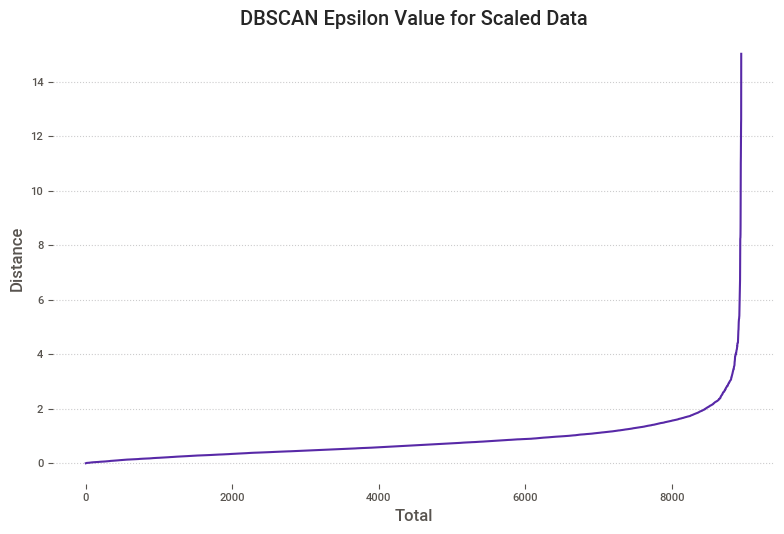

In [ ]:
X = df_scaled

def epsilon(X):

    neighbors = NearestNeighbors(n_neighbors=2)
    nbrs = neighbors.fit(X)
    distances, indices = nbrs.kneighbors(X)
    distances = np.sort(distances, axis=0)

    distances_1 = distances[:, 1]
    plt.plot(distances_1, color='#5829A7')
    plt.xlabel('Total')
    plt.ylabel('Distance')

    for spine in plt.gca().spines.values():
        spine.set_color('None')

    plt.grid(axis='y', alpha=0.5, color='#9B9A9C', linestyle='dotted')
    plt.grid(axis='x', alpha=0)

    plt.title('DBSCAN Epsilon Value for Scaled Data')
    plt.tight_layout()
    plt.show();

epsilon(X);

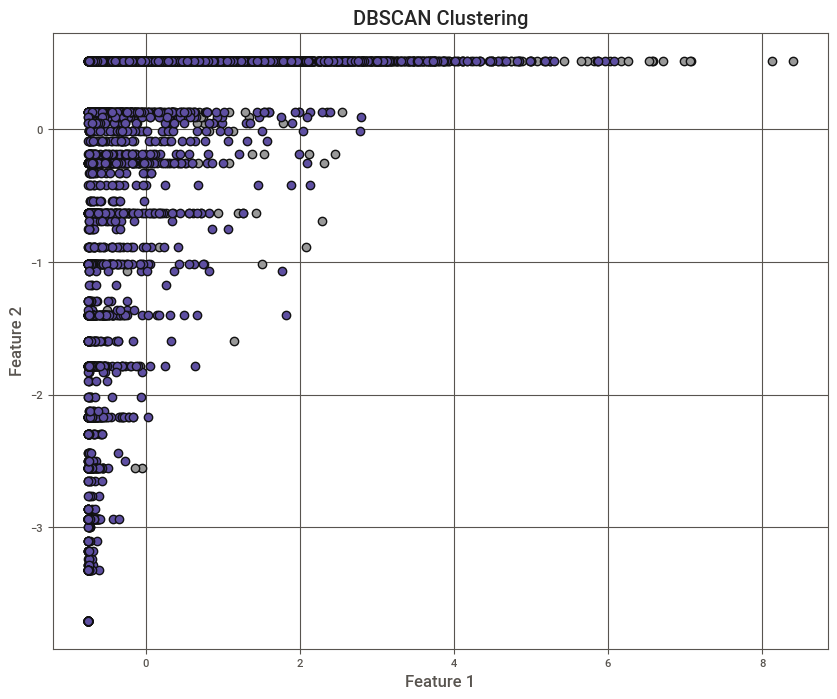

In [ ]:
dbscan = DBSCAN(eps=2.2, min_samples=5)
labels = dbscan.fit_predict(df_scaled)

plt.figure(figsize=(10, 8))
unique_labels = np.unique(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0.6, 0.6, 0.6, 1]
    class_member_mask = (labels == k)
    xy = df_scaled[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

In [ ]:
dbscan_normal = DBSCAN(eps=2.2, min_samples=5)
labels_normal = dbscan_normal.fit_predict(df_scaled)

results["DBSCAN"]["normal"]["Silhouette Coefficient"] = silhouette_score(df_scaled, labels_normal) if len(np.unique(labels_normal)) > 1 else 0
results["DBSCAN"]["normal"]["Calinski-Harabasz Index"] = calinski_harabasz_score(df_scaled, labels_normal)
results["DBSCAN"]["normal"]["Davies-Bouldin Index"] = davies_bouldin_score(df_scaled, labels_normal)

for metric, value in results["DBSCAN"]["normal"].items():
    print(f"{metric}: {value:.2f}")

Silhouette Coefficient: 0.52
Calinski-Harabasz Index: 939.76
Davies-Bouldin Index: 1.97


# Final Analysis

For K-Means :-
1. Silhouette Coefficient: 0.25
2. Calinski-Harabasz Index: 1604.41
3. Davies-Bouldin Index: 1.60

For DBSCAN :-
1. Silhouette Coefficient: 0.52
2. Calinski-Harabasz Index: 939.76
3. Davies-Bouldin Index: 1.97



1. Silhouette Coefficient: This value ranges between -1 and 1. A value closer to 1 indicates well-defined clusters, while a value closer to -1 indicates wrongly defined clusters. 0 indicates that clusters are close to each other or overlapping.

2. Calinski-Harabasz Index: A higher value indicates better defined clusters. This criterion measures the ratio between the density and distribution of clusters.

3. Davies-Bouldin Index: Lower values indicate better defined clusters. This index measures the similarity ratio for each cluster and takes the average of this ratio.

As we can see k-Means is the best